In [1]:
#have to use global, idk why venv wont work
import pandas as pd

In [2]:
df=pd.read_csv('./all.csv')

# --

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210600 entries, 0 to 210599
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   cl_sig           210600 non-null  object 
 1   pq_sig           210600 non-null  object 
 2   cl               210600 non-null  object 
 3   pq               210600 non-null  object 
 4   delay            210600 non-null  int64  
 5   loss             210600 non-null  int64  
 6   mtu              210600 non-null  int64  
 7   idx              210600 non-null  int64  
 8   decap_cl         210600 non-null  int64  
 9   decap_pq         210600 non-null  int64  
 10  decap_hybrid     210600 non-null  int64  
 11  sig_verify       175500 non-null  float64
 12  user_time        210600 non-null  object 
 13  system_time      210600 non-null  object 
 14  cpu              210600 non-null  int64  
 15  wall_clock_time  210600 non-null  object 
 16  memory           210600 non-null  int6

 0   cl_sig           210600 non-null  object 
 1   pq_sig           210600 non-null  object 
 2   cl               210600 non-null  object 
 3   pq               210600 non-null  object 
 12  user_time        210600 non-null  object 
 13  system_time      210600 non-null  object 
 15  wall_clock_time  210600 non-null  object 

In [4]:
df.pq_sig.unique()

array(['falcon512', 'mayo1', 'mldsa44', 'OV_Is', 'snova2454shake',
       'sphincsshake128fsimple'], dtype=object)

In [5]:
all_sigs=(
    "p256_mldsa44",
    "rsa3072_mldsa44",
    "p256_falcon512",
    "rsa3072_falcon512",
    "p256_sphincsshake128fsimple",
    "rsa3072_sphincsshake128fsimple",
    "p256_mayo1",
    "rsa3072_mayo1",
    "p256_OV_Is",
    "rsa3072_OV_Is",
    "p256_snova2454shake",
    "rsa3072_snova2454shake")
all_kems=(
    "p256_frodo640shake",
    "x25519_frodo640shake",
    "x448_frodo640shake",
    "p384_frodo976shake",#oops please remove these...
    "p256_mlkem512",
    "x25519_mlkem512",
    "x448_mlkem512",
    "p256_bikel1",
    "x25519_bikel1",
    "x448_bikel1",
    "p256_hqc128",
    "x25519_hqc128",
    "x448_hqc128"
)
len(all_kems)*len(all_sigs)*3*3*3*50

210600

# Remove bad kems

In [6]:
df=df[df.pq!='frodo976shake'].copy()
df=df.drop('idx',axis=1).copy()

# Fix obj columns
```
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 12  user_time        210600 non-null  object 
 13  system_time      210600 non-null  object 
 15  wall_clock_time  210600 non-null  object 
```

In [7]:
#... OK, the only reason we need any of these is to ensure handshake_ns is accurate...


#user_time 
df.user_time=pd.to_numeric(df.user_time.str.replace('"',''))*1e+9
#system_time
df.system_time=pd.to_numeric(df.system_time.str.replace('"',''))*1e+9



## wall clock time
- remove the 2 clear outliers

In [8]:
df.wall_clock_time.str.replace('"','').str.split(':')#pd.tonumeric(   .apply(''.join)))
pd.to_numeric(df.wall_clock_time.str.replace('"','').str.split(':').apply(''.join)).sort_values().tail()# yes I know that the bottom 2 are not the actual times they are 7*60+12.6 and 22*60*41.6

148889      18.46
173201      19.85
47638       20.62
55544      712.60
64998     2241.60
Name: wall_clock_time, dtype: float64

remove the outliers

In [9]:
df.wall_clock_time=pd.to_numeric(df.wall_clock_time.str.replace('"','').str.split(':').apply(''.join))

In [10]:
df=df[df.wall_clock_time<100].copy()

In [11]:
df[['wall_clock_time','system_time','user_time']]

,wall_clock_time,system_time,user_time
0,1.24,0.0,30000000.0
1,1.25,0.0,30000000.0
2,1.24,0.0,30000000.0
3,1.26,0.0,40000000.0
4,1.25,0.0,40000000.0
...,...,...,...
210595,0.10,0.0,30000000.0
210596,1.35,0.0,30000000.0
210597,0.17,0.0,40000000.0
210598,0.09,0.0,30000000.0


## Convert to ns

In [12]:
#convert to ns

#user_time 
df.user_time=df.user_time*1e+9
#system_time
df.system_time=df.system_time*1e+9
# wall_clock_time
df.wall_clock_time=df.wall_clock_time*1e+9
df


,cl_sig,pq_sig,cl,pq,delay,loss,mtu,decap_cl,decap_pq,decap_hybrid,...,user_time,system_time,cpu,wall_clock_time,memory,handshake_ns,encap_cl,encap_pq,encap_hybrid,packets
0,p256,falcon512,p256,bikel1,200,0,1280,766855,599142,1366197,...,3.000000e+16,0.0,3,1.240000e+09,11008,1263444185,96806.0,36803.0,133709.0,18
1,p256,falcon512,p256,bikel1,200,0,1280,3057919,2505379,5564098,...,3.000000e+16,0.0,3,1.250000e+09,11008,1274705890,94107.0,43103.0,137510.0,18
2,p256,falcon512,p256,bikel1,200,0,1280,642446,559540,1201986,...,3.000000e+16,0.0,2,1.240000e+09,10752,1257201838,88106.0,36703.0,125009.0,18
3,p256,falcon512,p256,bikel1,200,0,1280,2772298,2558983,5331882,...,4.000000e+16,0.0,3,1.260000e+09,10880,1294725523,83906.0,56804.0,140910.0,18
4,p256,falcon512,p256,bikel1,200,0,1280,2725695,2328167,5054262,...,4.000000e+16,0.0,3,1.250000e+09,11008,1273117877,83506.0,36003.0,119609.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210595,rsa3072,sphincsshake128fsimple,x448,mlkem512,5,5,576,335628,25802,361430,...,3.000000e+16,0.0,32,1.000000e+08,11136,120040062,371931.0,14502.0,386533.0,70
210596,rsa3072,sphincsshake128fsimple,x448,mlkem512,5,5,576,933077,41104,974481,...,3.000000e+16,0.0,3,1.350000e+09,10880,1367518183,839170.0,27602.0,867072.0,70
210597,rsa3072,sphincsshake128fsimple,x448,mlkem512,5,5,576,357129,17302,374531,...,4.000000e+16,0.0,22,1.700000e+08,11008,193080423,334228.0,12701.0,347029.0,70
210598,rsa3072,sphincsshake128fsimple,x448,mlkem512,5,5,576,363130,19402,382732,...,3.000000e+16,0.0,34,9.000000e+07,11136,119901550,318727.0,21601.0,340528.0,70


In [13]:
df.iloc[64998]

cl_sig                            p256
pq_sig                  snova2454shake
cl                                p256
pq                              bikel1
delay                              200
loss                                 1
mtu                               1500
decap_cl                        786514
decap_pq                        712503
decap_hybrid                   1499017
sig_verify                    572983.0
user_time          50000000000000000.0
system_time                        0.0
cpu                                  4
wall_clock_time           1260000000.0
memory                           11008
handshake_ns                1278677471
encap_cl                      158123.0
encap_pq                       40206.0
encap_hybrid                  198329.0
packets                             16
Name: 70400, dtype: object

# missing values
```
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 11  sig_verify       175500 non-null  float64
 18  encap_cl         202176 non-null  float64
 19  encap_pq         202176 non-null  float64
 20  encap_hybrid     201488 non-null  float64
```

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194398 entries, 0 to 210599
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   cl_sig           194398 non-null  object 
 1   pq_sig           194398 non-null  object 
 2   cl               194398 non-null  object 
 3   pq               194398 non-null  object 
 4   delay            194398 non-null  int64  
 5   loss             194398 non-null  int64  
 6   mtu              194398 non-null  int64  
 7   decap_cl         194398 non-null  int64  
 8   decap_pq         194398 non-null  int64  
 9   decap_hybrid     194398 non-null  int64  
 10  sig_verify       162000 non-null  float64
 11  user_time        194398 non-null  float64
 12  system_time      194398 non-null  float64
 13  cpu              194398 non-null  int64  
 14  wall_clock_time  194398 non-null  float64
 15  memory           194398 non-null  int64  
 16  handshake_ns     194398 non-null  int64  
 

In [15]:
#sig_verify
df[df.sig_verify.isna()].pq_sig.unique()

array(['OV_Is'], dtype=object)

In [16]:
#all(df[df.encap_cl.isna()].index==df[df.encap_pq.isna()].index)

In [17]:
print(df[df.encap_cl.isna()].cl.unique())
print(df[df.encap_cl.isna()].pq.unique())
print(df[df.encap_pq.isna()].cl.unique())
print(df[df.encap_pq.isna()].pq.unique())
# I am assuming that if something is missing from these then something went wrong (but could just be formatV2.py error?)


['p256' 'x25519' 'x448']
['bikel1' 'frodo640shake' 'hqc128' 'mlkem512']
['p256' 'x25519' 'x448']
['bikel1' 'frodo640shake' 'hqc128' 'mlkem512']


In [18]:
print(df.handshake_ns.isna().sum())

0


In [19]:

print(df.dropna().cl.unique())
print(df.dropna().pq.unique())
print(df.pq.unique())
print(df.dropna().shape)
#can likely just ignore them?
df=df.dropna()


['p256' 'x25519' 'x448']
['bikel1' 'frodo640shake' 'hqc128' 'mlkem512']
['bikel1' 'frodo640shake' 'hqc128' 'mlkem512']
(162000, 21)


In [20]:
df.delay.describe()
print(df.groupby('delay').delay.count())
print(df.groupby('loss').loss.count())
print(df.groupby('mtu').mtu.count())
print(df.groupby('cl').mtu.count())
print(df.groupby('pq').mtu.count())
print(df.groupby('cl_sig').mtu.count())
print(df.groupby('pq_sig').mtu.count())

delay
5      54000
25     54000
200    54000
Name: delay, dtype: int64
loss
0    54000
1    54000
5    54000
Name: loss, dtype: int64
mtu
576     54000
1280    54000
1500    54000
Name: mtu, dtype: int64
cl
p256      54000
x25519    54000
x448      54000
Name: mtu, dtype: int64
pq
bikel1           40500
frodo640shake    40500
hqc128           40500
mlkem512         40500
Name: mtu, dtype: int64
cl_sig
p256       81000
rsa3072    81000
Name: mtu, dtype: int64
pq_sig
falcon512                 32400
mayo1                     32400
mldsa44                   32400
snova2454shake            32400
sphincsshake128fsimple    32400
Name: mtu, dtype: int64


In [21]:
#df.groupby('loss').handshake_ns.count()
(df.groupby(['delay','loss','mtu','cl_sig','pq_sig','cl','pq']).handshake_ns.count()==50).sum()/len(df.groupby(['delay','loss','mtu','cl_sig','pq_sig','cl','pq']).handshake_ns.count())


np.float64(1.0)

confirmed to be evenly distributed

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162000 entries, 0 to 210599
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   cl_sig           162000 non-null  object 
 1   pq_sig           162000 non-null  object 
 2   cl               162000 non-null  object 
 3   pq               162000 non-null  object 
 4   delay            162000 non-null  int64  
 5   loss             162000 non-null  int64  
 6   mtu              162000 non-null  int64  
 7   decap_cl         162000 non-null  int64  
 8   decap_pq         162000 non-null  int64  
 9   decap_hybrid     162000 non-null  int64  
 10  sig_verify       162000 non-null  float64
 11  user_time        162000 non-null  float64
 12  system_time      162000 non-null  float64
 13  cpu              162000 non-null  int64  
 14  wall_clock_time  162000 non-null  float64
 15  memory           162000 non-null  int64  
 16  handshake_ns     162000 non-null  int64  
 

# non ml analysis

In [23]:
handshake_ex_crypto=df.handshake_ns-df[['sig_verify', 'decap_pq', 'decap_hybrid','encap_cl', 'encap_pq']].sum(axis=1)

In [24]:
(handshake_ex_crypto/df.handshake_ns).describe()
#what does this mean? if 1 then crypto has no affect on time, if 0 then crypto has all affect on shake. its a %
#should get histogram of this

count    162000.000000
mean          0.938119
std           0.113172
min           0.277033
25%           0.958630
50%           0.983234
75%           0.995677
max           0.999901
dtype: float64

# ml etc

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize


In [26]:
#cleaning
df_linear_regr=df.drop(['handshake_ns','user_time', 'system_time','wall_clock_time'],axis=1)
df_linear_regr=pd.get_dummies(df_linear_regr, columns=['cl_sig', 'pq_sig', 'cl', 'pq'])
print(df_linear_regr.columns)

col_to_normalise=['delay', 'loss', 'mtu', 'decap_cl', 'decap_pq', 'decap_hybrid',
       'sig_verify', 'cpu', 'memory', 'encap_cl', 'encap_pq', 'encap_hybrid',
       'packets']

df_linear_regr[col_to_normalise]=normalize(df_linear_regr[col_to_normalise])

Index(['delay', 'loss', 'mtu', 'decap_cl', 'decap_pq', 'decap_hybrid',
       'sig_verify', 'cpu', 'memory', 'encap_cl', 'encap_pq', 'encap_hybrid',
       'packets', 'cl_sig_p256', 'cl_sig_rsa3072', 'pq_sig_falcon512',
       'pq_sig_mayo1', 'pq_sig_mldsa44', 'pq_sig_snova2454shake',
       'pq_sig_sphincsshake128fsimple', 'cl_p256', 'cl_x25519', 'cl_x448',
       'pq_bikel1', 'pq_frodo640shake', 'pq_hqc128', 'pq_mlkem512'],
      dtype='object')


In [27]:
df_linear_regr

,delay,loss,mtu,decap_cl,decap_pq,decap_hybrid,sig_verify,cpu,memory,encap_cl,...,pq_sig_mldsa44,pq_sig_snova2454shake,pq_sig_sphincsshake128fsimple,cl_p256,cl_x25519,cl_x448,pq_bikel1,pq_frodo640shake,pq_hqc128,pq_mlkem512
0,1.169483e-04,0.000000e+00,0.000748,0.448412,0.350343,0.798872,0.167832,1.754224e-06,0.006437,0.056606,...,False,False,False,True,False,False,True,False,False,False
1,2.890615e-05,0.000000e+00,0.000185,0.441963,0.362104,0.804183,0.161915,4.335923e-07,0.001591,0.013601,...,False,False,False,True,False,False,True,False,False,False
2,1.330088e-04,0.000000e+00,0.000851,0.427255,0.372119,0.799374,0.170263,1.330088e-06,0.007151,0.058594,...,False,False,False,True,False,False,True,False,False,False
3,3.033061e-05,0.000000e+00,0.000194,0.420427,0.388078,0.808596,0.134586,4.549591e-07,0.001650,0.012725,...,False,False,False,True,False,False,True,False,False,False
4,3.204492e-05,0.000000e+00,0.000205,0.436723,0.373030,0.809817,0.117197,4.806738e-07,0.001764,0.013380,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210595,3.226803e-06,3.226803e-06,0.000372,0.216601,0.016652,0.233253,0.882281,2.065154e-05,0.007187,0.240030,...,False,False,True,False,False,True,False,False,False,True
210596,2.084667e-06,2.084667e-06,0.000240,0.389031,0.017138,0.406294,0.655766,1.250800e-06,0.004536,0.349878,...,False,False,True,False,False,True,False,False,False,True
210597,9.924306e-07,9.924306e-07,0.000114,0.070885,0.003434,0.074339,0.990091,4.366694e-06,0.002185,0.066340,...,False,False,True,False,False,True,False,False,False,True
210598,3.495226e-06,3.495226e-06,0.000403,0.253844,0.013563,0.267547,0.870174,2.376754e-05,0.007785,0.222805,...,False,False,True,False,False,True,False,False,False,True


In [28]:
X=df_linear_regr
y=df.handshake_ns
reg = LinearRegression().fit(X, y)
print("coef",reg.intercept_,reg.coef_)
print('score',reg.score(X, y))

coef 1576023562.6120586 [ 9.21475544e+12  7.21706899e+13 -1.98005346e+11 -2.98343865e+09
 -3.55011188e+09  2.73536000e+09 -3.49857482e+08 -2.19629889e+12
 -4.88944174e+10 -4.84606456e+09 -5.71300904e+09  4.47414434e+09
 -2.50842522e+12 -7.46116647e+06  7.46271119e+06 -7.10855792e+07
 -6.76033522e+07 -1.10613549e+07 -8.03076709e+07  2.30057497e+08
 -5.47368720e+07  5.05857511e+07  4.14790279e+06 -1.64895212e+08
  3.20119049e+08  1.94332480e+08 -3.49553944e+08]
score 0.3312405495728229


In [29]:
#cleaning
df_linear_regr=df.drop(['handshake_ns','user_time', 'system_time','wall_clock_time'],axis=1)
df_linear_regr=pd.get_dummies(df_linear_regr, columns=['cl_sig', 'pq_sig', 'cl', 'pq'])

X=df_linear_regr
y=df.handshake_ns
reg = LinearRegression().fit(X, y)
print("coef",reg.intercept_,reg.coef_)
print('score',reg.score(X, y))

coef -347603010.14684594 [ 8.14706544e+06  7.20505616e+07 -7.74578799e+04  1.38024877e+03
  1.37302333e+03 -1.37200087e+03  2.03477123e+01 -4.82048461e+06
  2.93735770e+04 -6.47118152e+01 -6.37851408e+01  5.84803175e+01
  6.96146981e+06  7.45111525e+05 -7.45111523e+05 -1.51851889e+07
 -2.77817326e+07  1.00260752e+07 -2.26695411e+07  5.56103874e+07
 -1.86806526e+06  2.39969538e+06 -5.31630127e+05 -3.29762917e+07
  9.38113014e+06  7.83476651e+07 -5.47525035e+07]
score 0.703218595336409


normalising completely ruins the regression

## logistic

In [30]:
from sklearn.linear_model import SGDClassifier

In [31]:
#cleaning
df_linear_regr=df.drop(['handshake_ns','user_time', 'system_time','wall_clock_time'],axis=1)
df_linear_regr=pd.get_dummies(df_linear_regr, columns=['cl_sig', 'pq_sig', 'cl', 'pq'])

In [32]:
#do stepwise

## can you predict from crypto only?

In [33]:
X=df_linear_regr[['cl_sig_p256', 'cl_sig_rsa3072', 'pq_sig_falcon512',
       'pq_sig_mayo1', 'pq_sig_mldsa44', 'pq_sig_snova2454shake',
       'pq_sig_sphincsshake128fsimple', 'cl_p256', 'cl_x25519',
       'cl_x448', 'pq_bikel1', 'pq_frodo640shake',
       'pq_hqc128', 'pq_mlkem512']]
y=df.handshake_ns
reg = LinearRegression().fit(X, y)
print("coef",reg.intercept_,reg.coef_)
print('score',reg.score(X, y))

coef 801878896.5818728 [-4.04652748e+06  4.04652748e+06 -6.85665397e+07 -7.40102883e+07
 -1.20455104e+07 -8.03037519e+07  2.34926090e+08  4.78433712e+06
 -6.34500714e+05 -4.14983641e+06 -5.80244019e+07  1.21284765e+08
  1.86302543e+07 -8.18906171e+07]
score 0.02253923898916177


No. Is it just network condition?

In [34]:
X=df_linear_regr[['delay', 'loss', 'mtu']]
y=df.handshake_ns
reg = LinearRegression().fit(X, y)
print("coef",reg.intercept_,reg.coef_)
print('score',reg.score(X, y))

coef 227024533.97405195 [ 8710675.37985938 79069143.91130058  -224465.76669012]
score 0.6739874877228129


In [35]:
X=df_linear_regr[['delay', 'loss', 'mtu','cl_sig_p256', 'cl_sig_rsa3072', 'pq_sig_falcon512',
       'pq_sig_mayo1', 'pq_sig_mldsa44', 'pq_sig_snova2454shake',
       'pq_sig_sphincsshake128fsimple', 'cl_p256', 'cl_x25519',
       'cl_x448', 'pq_bikel1', 'pq_frodo640shake',
       'pq_hqc128', 'pq_mlkem512']]
y=df.handshake_ns
reg = LinearRegression().fit(X, y)
print("coef",reg.intercept_,reg.coef_)
print('score',reg.score(X, y))

coef 227024533.97406483 [ 8.71067538e+06  7.90691439e+07 -2.24465767e+05 -4.04652748e+06
  4.04652748e+06 -6.85665397e+07 -7.40102883e+07 -1.20455104e+07
 -8.03037519e+07  2.34926090e+08  4.78433712e+06 -6.34500714e+05
 -4.14983641e+06 -5.80244019e+07  1.21284765e+08  1.86302543e+07
 -8.18906171e+07]
score 0.6965267267119748


Unclear

In [36]:
df_hot=pd.get_dummies(df, columns=['cl_sig', 'pq_sig', 'cl', 'pq'])

In [37]:
'''
pearson: 2 continuous
kendall & spearman: To measure the monotonic relationship between two variables when the data is not normally distributed or is ordinal. 
Spearman:
Often used when one variable is ordinal and the other is continuous, or when both are ordinal. 
Kendall:
Often used for ordinal data, especially with smaller sample sizes, and can be more robust than Spearman in those cases
'''
handshake_corr_pearson=df_hot.corrwith(df_hot.handshake_ns)
handshake_corr_pearson[handshake_corr_pearson.abs()>0.1]

df_hot_only=df_hot[['handshake_ns', 'cl_sig_p256', 'cl_sig_rsa3072', 'pq_sig_falcon512',
       'pq_sig_mayo1', 'pq_sig_mldsa44', 'pq_sig_snova2454shake',
       'pq_sig_sphincsshake128fsimple', 'cl_p256', 'cl_x25519',
       'cl_x448', 'pq_bikel1', 'pq_frodo640shake', 
       'pq_hqc128', 'pq_mlkem512']]
handshake_corr_spearman=df_hot_only.corrwith(df_hot_only.handshake_ns,method='spearman')
handshake_corr_spearman[handshake_corr_spearman.abs()>0.1]


handshake_ns                     1.000000
pq_sig_sphincsshake128fsimple    0.126624
pq_hqc128                        0.104920
dtype: float64

# Statistical Significance

## Statistical significance between crypto?

In [38]:
#does crypto choice have sig affect on crypto?
#is manova prropreate? do i exclude differing network conditions? do I test per network condition combo?

In [39]:
import statsmodels.formula.api as smf

model = smf.ols(
    "handshake_ns ~ C(cl_sig) + C(pq_sig) + C(cl) + C(pq) + delay + loss + mtu",
    data=df
).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           handshake_ns   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                 2.860e+04
Date:                Tue, 14 Oct 2025   Prob (F-statistic):               0.00
Time:                        23:56:07   Log-Likelihood:            -3.4836e+06
No. Observations:              162000   AIC:                         6.967e+06
Df Residuals:                  161986   BIC:                         6.967e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

Perfect — that’s exactly the kind of output we can interpret! You’re looking at a **statsmodels OLS regression summary**, and it’s dense, so let’s break it down **piece by piece** into what matters most.

---

## 🧩 1. **Model Overview (top section)**

```
Dep. Variable:           handshake_ns
R-squared:                       0.702
Adj. R-squared:                  0.702
F-statistic:                 2.947e+04
Prob (F-statistic):               0.00
No. Observations:              175500
Df Model:                          14
Df Residuals:                  175485
```

### What this tells you:

| Metric                      | Meaning                                            | Interpretation                                             |
| --------------------------- | -------------------------------------------------- | ---------------------------------------------------------- |
| **Dep. Variable**           | The thing you’re predicting (`handshake_ns`)       | Response variable (in nanoseconds)                         |
| **R-squared (0.702)**       | % of variance in handshake time explained by model | Your model explains **≈70%** of variation — pretty strong! |
| **Adj. R-squared**          | Adjusted for number of predictors                  | Practically the same, so no overfitting                    |
| **F-statistic & Prob(F)**   | Tests whether *any* predictor matters              | Huge F (~29,000) with p=0.00 → model is highly significant |
| **N (175,500)**             | Number of observations                             | Large sample size = robust inference                       |
| **Df Model / Df Residuals** | Degrees of freedom                                 | 14 predictors, 175,485 residual degrees of freedom         |

✅ **Conclusion:** The overall model is statistically significant — at least one variable (delay, loss, or an algorithm choice) affects handshake time.

---

## 📊 2. **Coefficients table**

Example rows:

```
C(pq_sig)[T.mldsa44]          5.096e+07   4.11e+06     12.406      0.000
C(pq_sig)[T.snova2454shake]  -1.136e+07   4.11e+06     -2.764      0.006
delay                         9.056e+06   1.48e+04    610.634      0.000
mtu                          -2.408e+05   3296.303    -73.041      0.000
```

Each line is one term in your regression equation:

[
\text{handshake_ns} = \beta_0 + \sum_i \beta_i X_i + \epsilon
]

### Columns explained:

| Column             | Meaning                                                   | How to interpret                                             |         |                                           |
| ------------------ | --------------------------------------------------------- | ------------------------------------------------------------ | ------- | ----------------------------------------- |
| **coef**           | Estimated effect on `handshake_ns` (compared to baseline) | Positive = increases handshake time; Negative = decreases it |         |                                           |
| **std err**        | Standard error of coefficient                             | Measure of uncertainty                                       |         |                                           |
| **t**              | t-statistic (coef / std err)                              | Larger                                                       | t       | means more statistically significant      |
| **P>               | t                                                         | **                                                           | p-value | Small (<0.05) → statistically significant |
| **[0.025, 0.975]** | 95% confidence interval                                   | True effect likely lies in this range                        |         |                                           |

---

## 🧠 3. **Interpreting your specific results**

Let’s interpret a few interesting ones:

| Variable                                            | coef  | p-value                                                                       | Meaning |
| --------------------------------------------------- | ----- | ----------------------------------------------------------------------------- | ------- |
| **C(cl_sig)[T.rsa3072] = +7.19e+06**                | 0.006 | Using RSA-3072 adds ~7 ms to handshake time (significant)                     |         |
| **C(pq_sig)[T.mldsa44] = +5.10e+07**                | 0.000 | ML-DSA-44 increases time by ~50 ms (very significant)                         |         |
| **C(pq_sig)[T.snova2454shake] = −1.13e+07**         | 0.006 | SNOVA reduces time by ~11 ms (significant)                                    |         |
| **C(pq_sig)[T.sphincsshake128fsimple] = +2.96e+08** | 0.000 | SPHINCS+ adds ~296 ms — large overhead                                        |         |
| **delay = 9.056e+06**                               | 0.000 | Each 1 unit of `delay` adds ~9 ms (likely your delay variable is in ms units) |         |
| **loss = 7.999e+07**                                | 0.000 | Each 1% loss adds ~80 ms of handshake delay                                   |         |
| **mtu = -2.4e+05**                                  | 0.000 | Larger MTU slightly decreases handshake time (~0.24 ms per byte increase)     |         |

✅ **Significant variables:** basically everything with p < 0.05 (most are), meaning all those algorithm choices and network conditions have measurable effects.

---

## ⚠️ 4. **Bottom warnings / diagnostics**

```
Omnibus: 214425.459   Prob(Omnibus): 0.000
Durbin-Watson: 1.494
Jarque-Bera (JB): 72849082.125
Skew: 6.286
Kurtosis: 102.016
Cond. No. 1.13e+16
```

| Test                      | What it checks                           | Interpretation                                                                                                            |
| ------------------------- | ---------------------------------------- | ------------------------------------------------------------------------------------------------------------------------- |
| **Omnibus / Jarque-Bera** | Whether residuals are normal             | p=0.00 → residuals are *not* normal (but with 175k samples, that’s common and usually fine)                               |
| **Durbin–Watson (1.494)** | Autocorrelation in residuals (1–3 is ok) | Slight positive autocorrelation; might not matter if samples are independent                                              |
| **Cond. No. (1.13e+16)**  | Multicollinearity                        | Very high → some predictors are strongly correlated (e.g., maybe pq vs pq_kem categories overlap or one-hot collinearity) |

💡 **To fix multicollinearity warning:**

* Make sure you’re not encoding redundant category levels.
* Drop one level of each categorical variable (statsmodels usually does this automatically, but check that your naming isn’t overlapping, e.g., `C(pq)` vs `C(pq_kem)`).

---

## 🧾 5. **Overall interpretation**

✅ **Your takeaway:**

* The model is highly statistically significant.
* PQ signatures and KEMs **do significantly affect handshake time**.
* Some (like SPHINCS+) are *huge* outliers in cost, while others (like SNOVA) improve performance.
* Delay, loss, and MTU also have strong, expected effects.

⚠️ **Caveats:**

* You have potential multicollinearity.
* Residuals aren’t perfectly normal, so treat tiny p-values with caution (though trends are robust given sample size).

---

Would you like me to help you **diagnose the multicollinearity issue** (e.g., check `VIF` values or fix categorical encoding)? That’s often the next step after seeing that big “Cond. No.” warning.


## are these linear models sig different?

### do classical, pq sigs and kem matter?
- yes, all significant? should compare to eachother etc

In [40]:
from statsmodels.stats.anova import anova_lm

In [41]:
base = smf.ols("handshake_ns ~ delay + loss + mtu", data=df).fit()
all = smf.ols("handshake_ns ~ delay + loss + mtu + C(cl_sig) + C(pq_sig) + C(cl) + C(pq)", data=df).fit()
all_pq = smf.ols("handshake_ns ~ delay + loss + mtu + C(pq_sig) + C(pq)", data=df).fit()
all_kem = smf.ols("handshake_ns ~ delay + loss + mtu + C(cl) + C(pq)", data=df).fit()
pq_kem = smf.ols("handshake_ns ~ delay + loss + mtu + C(pq)", data=df).fit()
all_sig = smf.ols("handshake_ns ~ delay + loss + mtu + C(cl_sig) + C(pq_sig)", data=df).fit()
pq_sig = smf.ols("handshake_ns ~ delay + loss + mtu + C(pq_sig)", data=df).fit()

print(anova_lm(base, all))
print(anova_lm(base, all_pq))
print(anova_lm(base, all_kem))
print(anova_lm(base, pq_kem))
print(anova_lm(base, all_sig))
print(anova_lm(base, pq_sig))


   df_resid           ssr  df_diff       ss_diff            F  Pr(>F)
0  161996.0  4.851595e+22      0.0           NaN          NaN     NaN
1  161986.0  4.516174e+22     10.0  3.354204e+21  1203.084913     0.0
   df_resid           ssr  df_diff       ss_diff            F  Pr(>F)
0  161996.0  4.851595e+22      0.0           NaN          NaN     NaN
1  161989.0  4.516659e+22      7.0  3.349364e+21  1716.060381     0.0
   df_resid           ssr  df_diff       ss_diff           F  Pr(>F)
0  161996.0  4.851595e+22      0.0           NaN         NaN     NaN
1  161991.0  4.749600e+22      5.0  1.019952e+21  695.734697     0.0
   df_resid           ssr  df_diff       ss_diff            F  Pr(>F)
0  161996.0  4.851595e+22      0.0           NaN          NaN     NaN
1  161993.0  4.749818e+22      3.0  1.017764e+21  1157.031638     0.0
   df_resid           ssr  df_diff       ss_diff            F  Pr(>F)
0  161996.0  4.851595e+22      0.0           NaN          NaN     NaN
1  161991.0  4.618170e+

does seem like they are significant as p is less than 0.05

ok, anova_lm shows that including sigs and kems is a signficant difference, and from before we saw that r^2 is greater when they are included.

## Does the memory matter?
- yes?

In [42]:
base = smf.ols("handshake_ns ~ delay", data=df).fit()
memory = smf.ols("handshake_ns ~ delay + memory", data=df).fit()
all = smf.ols("handshake_ns ~ delay + loss + mtu + memory", data=df).fit()

print(anova_lm(base, memory))
print()
base = smf.ols("handshake_ns ~ delay + loss + mtu", data=df).fit()
all = smf.ols("handshake_ns ~ delay + loss + mtu + memory", data=df).fit()
print(anova_lm(base, all))


base = smf.ols("handshake_ns ~ delay + loss + mtu + C(pq)", data=df).fit()
all = smf.ols("handshake_ns ~ delay + loss + mtu  + C(pq) + memory", data=df).fit()
print(anova_lm(base, all))


   df_resid           ssr  df_diff       ss_diff           F         Pr(>F)
0  161998.0  5.451010e+22      0.0           NaN         NaN            NaN
1  161997.0  5.427173e+22      1.0  2.383760e+20  711.534369  2.026699e-156

   df_resid           ssr  df_diff       ss_diff           F        Pr(>F)
0  161996.0  4.851595e+22      0.0           NaN         NaN           NaN
1  161995.0  4.842415e+22      1.0  9.179435e+19  307.082819  1.092083e-68
   df_resid           ssr  df_diff       ss_diff           F         Pr(>F)
0  161993.0  4.749818e+22      0.0           NaN         NaN            NaN
1  161992.0  4.721557e+22      1.0  2.826164e+20  969.629227  3.053644e-212


### Does it differ significantly between combinations?
- we only capture memory for the client, not server. Do people run servers on IoT?
- the memory is valid as we use time -v on openssl s_client, meaning it only captures peak RSS on that process
    - but still worth mentioning as it can interfere

In [43]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('memory ~ C(cl_sig) + C(pq_sig) + C(cl) + C(pq)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)# sequential sum of squares, test each term as they appear in the formula
print(anova_table)
anova_table = sm.stats.anova_lm(model, typ=2)# hierarchical / marginal sums of squares
print(anova_table)


                 df        sum_sq       mean_sq             F  PR(>F)
C(cl_sig)       1.0  1.343398e+08  1.343398e+08   1813.209966     0.0
C(pq_sig)       4.0  1.621905e+09  4.054762e+08   5472.789718     0.0
C(cl)           2.0  3.246870e+09  1.623435e+09  21911.814954     0.0
C(pq)           3.0  9.872191e+08  3.290730e+08   4441.561894     0.0
Residual   161989.0  1.200168e+10  7.408948e+04           NaN     NaN
                 sum_sq        df             F  PR(>F)
C(cl_sig)  1.343398e+08       1.0   1813.209966     0.0
C(pq_sig)  1.621905e+09       4.0   5472.789718     0.0
C(cl)      3.246870e+09       2.0  21911.814954     0.0
C(pq)      9.872191e+08       3.0   4441.561894     0.0
Residual   1.200168e+10  161989.0           NaN     NaN


In [44]:
model1 = ols('memory ~ 1', data=df).fit()
model2 = ols('memory ~ C(cl_sig)', data=df).fit()
anova_table = sm.stats.anova_lm(model1, model2,typ=1)# sequential sum of squares, test each term as they appear in the formula
print(anova_table)
anova_table = sm.stats.anova_lm(model2, typ=1)# sequential sum of squares, test each term as they appear in the formula
print(anova_table)


   df_resid           ssr  df_diff       ss_diff            F         Pr(>F)
0  161999.0  1.799202e+10      0.0           NaN          NaN            NaN
1  161998.0  1.785768e+10      1.0  1.343398e+08  1218.679198  5.222366e-266
                 df        sum_sq       mean_sq            F         PR(>F)
C(cl_sig)       1.0  1.343398e+08  1.343398e+08  1218.679198  5.222366e-266
Residual   161998.0  1.785768e+10  1.102339e+05          NaN            NaN


typ 1 Table explanations:
| Row         | Compared models                                                                              | Meaning                                        |
| ----------- | -------------------------------------------------------------------------------------------- | ---------------------------------------------- |
| `C(cl_sig)` | `memory ~ 1` vs `memory ~ C(cl_sig)`                                                         | Effect of classical signature alone            |
| `C(pq_sig)` | `memory ~ C(cl_sig)` vs `memory ~ C(cl_sig) + C(pq_sig)`                                     | Added effect of pq_sig after cl_sig            |
| `C(cl)`     | `memory ~ C(cl_sig) + C(pq_sig)` vs `memory ~ C(cl_sig) + C(pq_sig) + C(cl)`                 | Added effect of classical KEM after signatures |
| `C(pq)`     | `memory ~ C(cl_sig) + C(pq_sig) + C(cl)` vs `memory ~ C(cl_sig) + C(pq_sig) + C(cl) + C(pq)` | Added effect of pq KEM after everything else   |

typ 2 Table explanations:
| Row         | Compared models                                                                              | Meaning                                                      |
| ----------- | -------------------------------------------------------------------------------------------- | ------------------------------------------------------------ |
| `C(cl_sig)` | `memory ~ C(pq_sig) + C(cl) + C(pq)` vs `memory ~ C(cl_sig) + C(pq_sig) + C(cl) + C(pq)`     | Does `cl_sig` still matter once you include everything else? |
| `C(pq_sig)` | `memory ~ C(cl_sig) + C(cl) + C(pq)` vs `memory ~ C(cl_sig) + C(pq_sig) + C(cl) + C(pq)`     | Does `pq_sig` still matter controlling for others?           |
| `C(cl)`     | `memory ~ C(cl_sig) + C(pq_sig) + C(pq)` vs `memory ~ C(cl_sig) + C(pq_sig) + C(cl) + C(pq)` | Does `cl` still matter controlling for signatures + pq?      |
| `C(pq)`     | `memory ~ C(cl_sig) + C(pq_sig) + C(cl)` vs `memory ~ C(cl_sig) + C(pq_sig) + C(cl) + C(pq)` | Does `pq` still matter controlling for signatures + cl?      |



## Does the classical component matter?
- Handshake: when accounting for loss, mtu & delay it does. If you don't include those it doesn't
- memory: yes

In [45]:
all = ols('handshake_ns ~ delay + loss + mtu + C(cl_sig) + C(pq_sig) + C(cl) + C(pq)', data=df).fit()
no_cl_sig = ols('handshake_ns ~ delay + loss + mtu + C(pq_sig) + C(cl) + C(pq)', data=df).fit()
no_cl_kem = ols('handshake_ns ~ delay + loss + mtu + C(cl_sig) + C(pq_sig) + C(pq)', data=df).fit()
pq = ols('handshake_ns ~ delay + loss + mtu + C(pq_sig) + C(pq)', data=df).fit()


print("no_cl_sig")
anova_table = anova_lm(no_cl_sig, all)
print(anova_table)

print("no_cl_kem")
anova_table = anova_lm(no_cl_kem, all)
print(anova_table)

print("pq")
anova_table = anova_lm(pq, all)
print(anova_table)


no_cl_sig
   df_resid           ssr  df_diff       ss_diff         F    Pr(>F)
0  161987.0  4.516440e+22      0.0           NaN       NaN       NaN
1  161986.0  4.516174e+22      1.0  2.652650e+18  9.514518  0.002039
no_cl_kem
   df_resid           ssr  df_diff       ss_diff         F    Pr(>F)
0  161988.0  4.516393e+22      0.0           NaN       NaN       NaN
1  161986.0  4.516174e+22      2.0  2.187735e+18  3.923481  0.019774
pq
   df_resid           ssr  df_diff       ss_diff        F    Pr(>F)
0  161989.0  4.516659e+22      0.0           NaN      NaN       NaN
1  161986.0  4.516174e+22      3.0  4.840386e+18  5.78716  0.000596


In [46]:
all = ols('memory ~ delay + loss + mtu + C(cl_sig) + C(pq_sig) + C(cl) + C(pq)', data=df).fit()
no_cl_sig = ols('memory ~ delay + loss + mtu + C(pq_sig) + C(cl) + C(pq)', data=df).fit()
no_cl_kem = ols('memory ~ delay + loss + mtu + C(cl_sig) + C(pq_sig) + C(pq)', data=df).fit()
pq = ols('memory ~ delay + loss + mtu + C(pq_sig) + C(pq)', data=df).fit()


print("no_cl_sig")
anova_table = anova_lm(no_cl_sig, all)
print(anova_table)

print("no_cl_kem")
anova_table = anova_lm(no_cl_kem, all)
print(anova_table)

print("pq")
anova_table = anova_lm(pq, all)
print(anova_table)


no_cl_sig
   df_resid           ssr  df_diff       ss_diff            F  Pr(>F)
0  161987.0  3.912259e+09      0.0           NaN          NaN     NaN
1  161986.0  3.777919e+09      1.0  1.343398e+08  5760.093045     0.0
no_cl_kem
   df_resid           ssr  df_diff       ss_diff             F  Pr(>F)
0  161988.0  7.024789e+09      0.0           NaN           NaN     NaN
1  161986.0  3.777919e+09      2.0  3.246870e+09  69608.095752     0.0
pq
   df_resid           ssr  df_diff       ss_diff             F  Pr(>F)
0  161989.0  7.159129e+09      0.0           NaN           NaN     NaN
1  161986.0  3.777919e+09      3.0  3.381210e+09  48325.428183     0.0


## Does delay, loss or mtu matter for predicting handshake time?
- Yes, they all individually improve when compared to just delay (delay obviously has an affect which is why it is base)

In [47]:
all = smf.ols("handshake_ns ~ delay + loss + mtu", data=df).fit()
print(anova_lm(all))


                df        sum_sq       mean_sq              F  PR(>F)
delay          1.0  9.430611e+22  9.430611e+22  314890.535479     0.0
loss           1.0  4.726459e+21  4.726459e+21   15781.767095     0.0
mtu            1.0  1.267696e+21  1.267696e+21    4232.871152     0.0
Residual  161996.0  4.851595e+22  2.994886e+17            NaN     NaN


In [48]:
# what is this and how does it differ to `print(anova_lm(base, loss, all))`?
all = smf.ols("handshake_ns ~ delay + loss + mtu", data=df).fit()
print(anova_lm(all,typ=2))
'''
typ=2 equivalent to
For delay: test handshake_ns ~ loss + mtu vs handshake_ns ~ delay + loss + mtu
For loss: test handshake_ns ~ delay + mtu vs handshake_ns ~ delay + loss + mtu
For mtu: test handshake_ns ~ delay + loss vs handshake_ns ~ delay + loss + mtu

while `print(anova_lm(base, loss, all))` is
base vs loss vs all, so 3 lines and 2 p values
'''

                sum_sq        df              F  PR(>F)
delay     9.430611e+22       1.0  314890.535480     0.0
loss      4.726459e+21       1.0   15781.767095     0.0
mtu       1.267696e+21       1.0    4232.871152     0.0
Residual  4.851595e+22  161996.0            NaN     NaN


'\ntyp=2 equivalent to\nFor delay: test handshake_ns ~ loss + mtu vs handshake_ns ~ delay + loss + mtu\nFor loss: test handshake_ns ~ delay + mtu vs handshake_ns ~ delay + loss + mtu\nFor mtu: test handshake_ns ~ delay + loss vs handshake_ns ~ delay + loss + mtu\n\nwhile `print(anova_lm(base, loss, all))` is\nbase vs loss vs all, so 3 lines and 2 p values\n'

# Do signatures matter?

In [49]:
from statsmodels.stats.anova import anova_lm

base = smf.ols("handshake_ns ~ delay + loss + mtu + C(cl) + C(pq)", data=df).fit()
all = smf.ols("handshake_ns ~ delay + loss + mtu + C(cl_sig) + C(pq_sig) + C(cl) + C(pq)", data=df).fit()

print(f"adj r^2\nbase:{base.rsquared_adj}\nall:{all.rsquared_adj}")
print(anova_lm(base, all))

adj r^2
base:0.6808254959091229
all:0.6965023718136951
   df_resid           ssr  df_diff       ss_diff            F  Pr(>F)
0  161991.0  4.749600e+22      0.0           NaN          NaN     NaN
1  161986.0  4.516174e+22      5.0  2.334252e+21  1674.497628     0.0


yes

## fastest combination?

## lowest memory?
- should also look at sizes of sig, ct and ss etc

## least packets

## cpu util

In [50]:
df.select_dtypes('number').corrwith(df.cpu)

a=df_hot.corrwith(df.cpu,method="spearman")
a[a.abs()>.1]

delay              -0.880825
loss               -0.153782
decap_cl           -0.112057
sig_verify         -0.168154
cpu                 1.000000
wall_clock_time    -0.928903
memory              0.579665
handshake_ns       -0.926969
encap_cl           -0.111250
pq_frodo640shake   -0.119337
pq_hqc128           0.186047
dtype: float64

# Plotting
- we don't really have enough x values to plot, only 3 etc
- too many combinations to visualize
    - can we maybe do top x?

In [51]:
# df.corrwith(df.memory)


C:\Users\robso\AppData\Local\Temp\ipykernel_11280\1458298462.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plotting['combination']=df.cl_sig+'_'+df.pq_sig+'_'+df.cl+'_'+df.pq


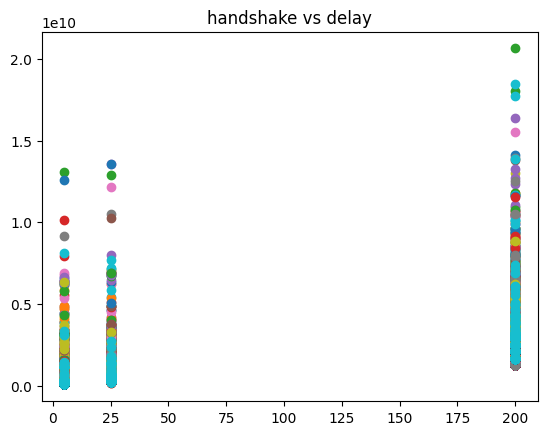

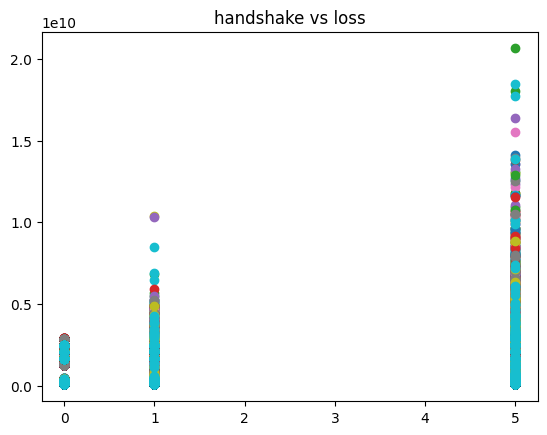

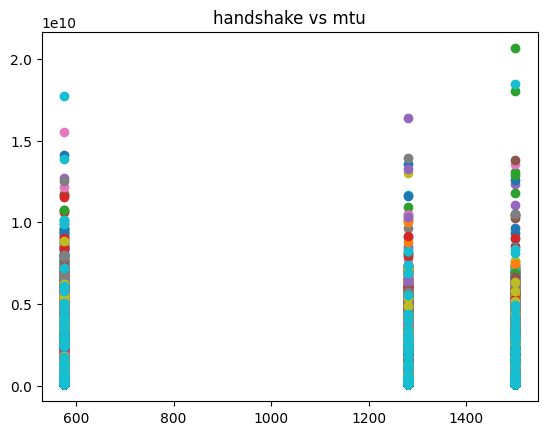

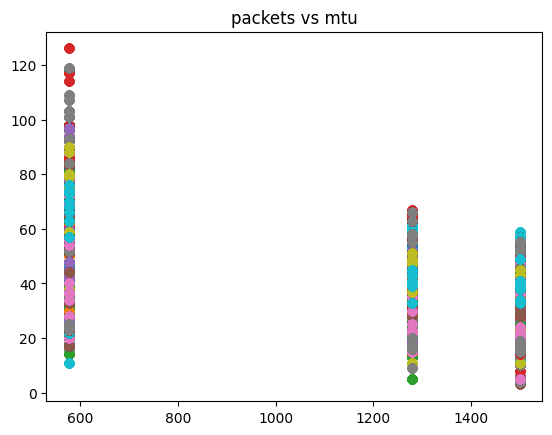

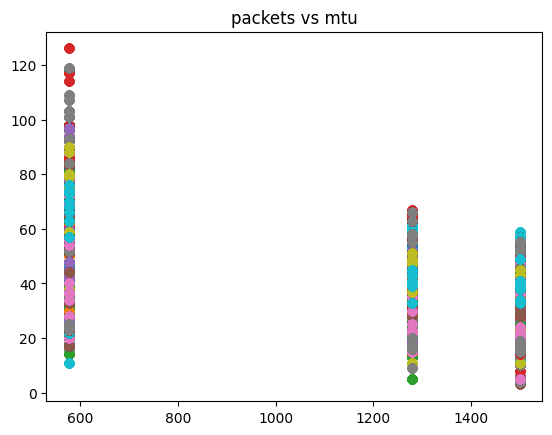

In [52]:
import matplotlib.pyplot as plt
#plot combination as lines, y as handshake, x as delay, loss, mtu
# plot combination as lines, y as packets, mtu as x (and maybe loss)
df_plotting=df
df_plotting['combination']=df.cl_sig+'_'+df.pq_sig+'_'+df.cl+'_'+df.pq
combinations=df_plotting['combination'].unique()

# handshake_ns
## delay
for combo in combinations:
        tmp=df_plotting[df_plotting.combination==combo]
        plt.scatter(tmp.delay,tmp.handshake_ns)
plt.title('handshake vs delay')
plt.show()

## loss
for combo in combinations:
        tmp=df_plotting[df_plotting.combination==combo]
        plt.scatter(tmp.loss,tmp.handshake_ns)
plt.title('handshake vs loss')
plt.show()

## mtu
for combo in combinations:
        tmp=df_plotting[df_plotting.combination==combo]
        plt.scatter(tmp.mtu,tmp.handshake_ns)
plt.title('handshake vs mtu')
plt.show()

# packets vs mtu
for combo in combinations:
        tmp=df_plotting[df_plotting.combination==combo]
        plt.scatter(tmp.mtu,tmp.packets)
plt.title('packets vs mtu')
plt.show()

# handshake vs memory
for combo in combinations:
        tmp=df_plotting[df_plotting.combination==combo]
        plt.scatter(tmp.mtu,tmp.packets)
plt.title('packets vs mtu')
plt.show()

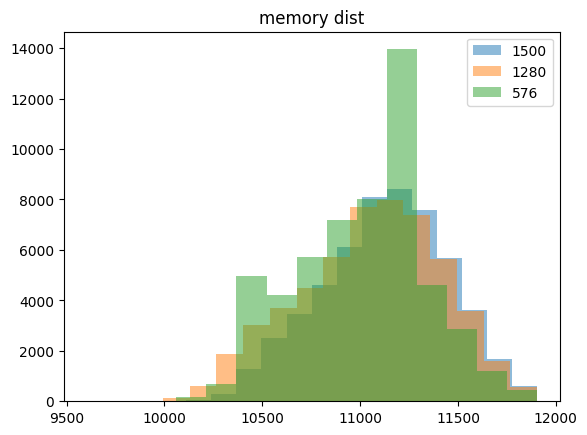

In [53]:
df.memory.describe()
# plt.hist(df.memory)
plt.hist(df[df.mtu==1500].memory,alpha =0.5,bins=15, label='1500')
plt.hist(df[df.mtu==1280].memory,alpha =0.5,bins=15, label='1280')
plt.hist(df[df.mtu==576].memory,alpha =0.5,bins=15, label ='576')
plt.legend()
plt.title("memory dist")
plt.show()


# What are the best?
- does the best differ in network conditions?

## handshake speed

In [54]:
df.groupby('combination').handshake_ns.mean().sort_values()

combination
p256_snova2454shake_x448_mlkem512                      6.265590e+08
rsa3072_snova2454shake_x25519_mlkem512                 6.278816e+08
rsa3072_snova2454shake_x448_mlkem512                   6.285116e+08
p256_mayo1_x25519_bikel1                               6.336489e+08
p256_falcon512_x448_mlkem512                           6.352185e+08
                                                           ...     
rsa3072_sphincsshake128fsimple_x448_frodo640shake      1.137260e+09
rsa3072_sphincsshake128fsimple_p256_frodo640shake      1.142178e+09
p256_sphincsshake128fsimple_x448_frodo640shake         1.157504e+09
p256_sphincsshake128fsimple_p256_frodo640shake         1.163118e+09
rsa3072_sphincsshake128fsimple_x25519_frodo640shake    1.164049e+09
Name: handshake_ns, Length: 120, dtype: float64

In [55]:
model = smf.ols(
    "handshake_ns ~ C(cl_sig) + C(pq_sig) + C(cl) + C(pq) + delay + loss + mtu",
    data=df
).fit()
# print(model.summary())
print(model.params)
print(df.cl_sig.unique())
print(df.pq_sig.unique())
print(df.cl.unique())
print(df.pq.unique())

Intercept                              1.011714e+08
C(cl_sig)[T.rsa3072]                   8.093055e+06
C(pq_sig)[T.mayo1]                    -5.443749e+06
C(pq_sig)[T.mldsa44]                   5.652103e+07
C(pq_sig)[T.snova2454shake]           -1.173721e+07
C(pq_sig)[T.sphincsshake128fsimple]    3.034926e+08
C(cl)[T.x25519]                       -5.418838e+06
C(cl)[T.x448]                         -8.934174e+06
C(pq)[T.frodo640shake]                 1.793092e+08
C(pq)[T.hqc128]                        7.665466e+07
C(pq)[T.mlkem512]                     -2.386622e+07
delay                                  8.710675e+06
loss                                   7.906914e+07
mtu                                   -2.244658e+05
dtype: float64
['p256' 'rsa3072']
['falcon512' 'mayo1' 'mldsa44' 'snova2454shake' 'sphincsshake128fsimple']
['p256' 'x25519' 'x448']
['bikel1' 'frodo640shake' 'hqc128' 'mlkem512']


## memory usage
- should get sizes
- this is peak RSS...

In [56]:
df.groupby('combination').memory.mean().sort_values()

combination
rsa3072_sphincsshake128fsimple_x448_bikel1      10625.137778
rsa3072_sphincsshake128fsimple_x25519_bikel1    10633.102222
rsa3072_sphincsshake128fsimple_x448_hqc128      10671.976296
rsa3072_sphincsshake128fsimple_x25519_hqc128    10694.162963
p256_sphincsshake128fsimple_x25519_bikel1       10719.762963
                                                    ...     
rsa3072_snova2454shake_p256_mlkem512            11381.665185
rsa3072_mayo1_p256_frodo640shake                11390.293333
rsa3072_falcon512_p256_frodo640shake            11399.016296
p256_mayo1_p256_mlkem512                        11408.877037
rsa3072_mayo1_p256_mlkem512                     11440.450370
Name: memory, Length: 120, dtype: float64

I assume kB so 0.010625137778GB... if it was mb then it would be 10 so unlikely? we do have 16
- it is kbytes

In [57]:
model = smf.ols(
    "memory ~ C(cl_sig) + C(pq_sig) + C(cl) + C(pq) + delay + loss + mtu",
    data=df
).fit()
# print(model.summary())
print(model.params)
print(df.cl_sig.unique())
print(df.pq_sig.unique())
print(df.cl.unique())
print(df.pq.unique())

Intercept                              11335.649396
C(cl_sig)[T.rsa3072]                     -57.593679
C(pq_sig)[T.mayo1]                        33.544691
C(pq_sig)[T.mldsa44]                     -94.625185
C(pq_sig)[T.snova2454shake]                1.283951
C(pq_sig)[T.sphincsshake128fsimple]     -240.979753
C(cl)[T.x25519]                         -297.064296
C(cl)[T.x448]                           -303.469037
C(pq)[T.frodo640shake]                   213.696790
C(pq)[T.hqc128]                          101.398123
C(pq)[T.mlkem512]                        150.091852
delay                                     -2.553508
loss                                      -3.602455
mtu                                        0.066044
dtype: float64
['p256' 'rsa3072']
['falcon512' 'mayo1' 'mldsa44' 'snova2454shake' 'sphincsshake128fsimple']
['p256' 'x25519' 'x448']
['bikel1' 'frodo640shake' 'hqc128' 'mlkem512']


lowest mem is rsa3072_sphincsshake128fsimple_x448_bikel1, which is the same as mean lowest

## cpu util

In [58]:
df.groupby('combination').cpu.mean().sort_values()

combination
rsa3072_sphincsshake128fsimple_x25519_frodo640shake    14.132593
rsa3072_sphincsshake128fsimple_x448_frodo640shake      14.554815
p256_sphincsshake128fsimple_x25519_frodo640shake       14.862963
rsa3072_sphincsshake128fsimple_x25519_mlkem512         14.892593
rsa3072_sphincsshake128fsimple_x25519_bikel1           15.048148
                                                         ...    
p256_falcon512_p256_hqc128                             24.842963
rsa3072_snova2454shake_p256_hqc128                     24.866667
rsa3072_falcon512_p256_hqc128                          24.898519
p256_mayo1_p256_hqc128                                 24.912593
p256_snova2454shake_p256_hqc128                        24.980000
Name: cpu, Length: 120, dtype: float64

In [59]:
model = smf.ols(
    "cpu ~ C(cl_sig) + C(pq_sig) + C(cl) + C(pq) + delay + loss + mtu",
    data=df
).fit()
# print(model.summary())
print(model.params)
print(df.cl_sig.unique())
print(df.pq_sig.unique())
print(df.cl.unique())
print(df.pq.unique())

Intercept                              31.831319
C(cl_sig)[T.rsa3072]                   -0.285358
C(pq_sig)[T.mayo1]                      0.032963
C(pq_sig)[T.mldsa44]                   -0.649352
C(pq_sig)[T.snova2454shake]             0.088858
C(pq_sig)[T.sphincsshake128fsimple]    -3.262809
C(cl)[T.x25519]                        -0.982907
C(cl)[T.x448]                          -0.864241
C(pq)[T.frodo640shake]                 -2.235333
C(pq)[T.hqc128]                         4.681704
C(pq)[T.mlkem512]                      -0.316198
delay                                  -0.150761
loss                                   -1.215761
mtu                                     0.002536
dtype: float64
['p256' 'rsa3072']
['falcon512' 'mayo1' 'mldsa44' 'snova2454shake' 'sphincsshake128fsimple']
['p256' 'x25519' 'x448']
['bikel1' 'frodo640shake' 'hqc128' 'mlkem512']


rsa3072_sphincsshake128fsimple_x25519_frodo640shake, same as mean

## Are the differences between combinations statistically significant?

In [60]:
for i in ['handshake_ns','memory','cpu']:
    model = smf.ols(
        f"{i} ~ C(cl_sig) + C(pq_sig) + C(cl) + C(pq) + delay + loss + mtu",
        data=df
    ).fit()
    print(i)
    print(model.summary())

handshake_ns
                            OLS Regression Results                            
Dep. Variable:           handshake_ns   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                 2.860e+04
Date:                Tue, 14 Oct 2025   Prob (F-statistic):               0.00
Time:                        23:56:55   Log-Likelihood:            -3.4836e+06
No. Observations:              162000   AIC:                         6.967e+06
Df Residuals:                  161986   BIC:                         6.967e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

handshake_ns
- mayo, x25519 not sig?

memory
- snova2454shake not sig?

cpu
- mayo and snova not sig?

what does that mean? should I be doing t tests?

In [61]:
import numpy as np
from scipy import stats

# F oneway

In [62]:
'''
p256_snova2454shake_x448_mlkem512                      6.265590e+08
rsa3072_snova2454shake_x25519_mlkem512                 6.278816e+08
rsa3072_snova2454shake_x448_mlkem512                   6.285116e+08
p256_mayo1_x25519_bikel1                               6.336489e+08
p256_falcon512_x448_mlkem512                           6.352185e+08
'''
t_statistic, p_value = stats.ttest_rel(df[df.combination=='p256_snova2454shake_x448_mlkem512'].handshake_ns,
                                       df[df.combination=='rsa3072_snova2454shake_x25519_mlkem512'].handshake_ns)
print(t_statistic, p_value)
# not sig different....


-0.08613967470114106 0.9313681678908894


In [63]:
f_statistic, p_value = stats.f_oneway(df[df.combination=='p256_snova2454shake_x448_mlkem512'].handshake_ns,
                                      df[df.combination=='rsa3072_snova2454shake_x25519_mlkem512'].handshake_ns,
                                      df[df.combination=='rsa3072_snova2454shake_x448_mlkem512'].handshake_ns,
                                      df[df.combination=='p256_mayo1_x25519_bikel1'].handshake_ns,
                                      df[df.combination=='p256_falcon512_x448_mlkem512'].handshake_ns)
print(f_statistic, p_value)
# they are not sig different...

0.03900413252444392 0.9971102861159358


In [200]:
f_statistic, p_value = stats.f_oneway(df[df.combination=='p256_snova2454shake_x448_mlkem512'].decap_hybrid,
                                      df[df.combination=='rsa3072_snova2454shake_x25519_mlkem512'].decap_hybrid,
                                      df[df.combination=='rsa3072_snova2454shake_x448_mlkem512'].decap_hybrid,
                                      df[df.combination=='p256_mayo1_x25519_bikel1'].decap_hybrid,
                                      df[df.combination=='p256_falcon512_x448_mlkem512'].decap_hybrid)
print(f_statistic, p_value)

679.0026323251058 0.0


total dec speeds are different. THe reason that handshake ist is likely because we arent controlling for network conditions (and whatever overhead that openssl has) . Encapsulation does somewhat control for that. therefore they are different (unless there is no correlation between encap and handshake_ns)

In [106]:
df.select_dtypes("number").corrwith(df.handshake_ns)

delay              0.796058
loss               0.178214
mtu               -0.092296
decap_cl           0.121969
decap_pq           0.034090
decap_hybrid       0.042313
sig_verify         0.146621
user_time          0.104587
system_time        0.055793
cpu               -0.669095
wall_clock_time    0.999979
memory            -0.563939
handshake_ns       1.000000
encap_cl           0.041619
encap_pq           0.028118
encap_hybrid       0.030223
packets            0.120085
dtype: float64

ok, there is a low correlation

In [64]:

for delay in df.delay.unique():
    for loss in df.loss.unique():
        for mtu in df.mtu.unique():
            f_statistic, p_value = stats.f_oneway(df[(df.combination=='p256_snova2454shake_x448_mlkem512') & (df.delay==delay) & (df.loss==loss) & (df.mtu==mtu)].handshake_ns,
                                                df[(df.combination=='rsa3072_snova2454shake_x25519_mlkem512') & (df.delay==delay) & (df.loss==loss) & (df.mtu==mtu)].handshake_ns,
                                                df[(df.combination=='rsa3072_snova2454shake_x448_mlkem512') & (df.delay==delay) & (df.loss==loss) & (df.mtu==mtu)].handshake_ns,
                                                df[(df.combination=='p256_mayo1_x25519_bikel1') & (df.delay==delay) & (df.loss==loss) & (df.mtu==mtu)].handshake_ns,
                                                df[(df.combination=='p256_falcon512_x448_mlkem512') & (df.delay==delay) & (df.loss==loss) & (df.mtu==mtu)].handshake_ns)
            print(f'delay{delay}loss{loss}mtu{mtu}p_value:{p_value}')

delay200loss0mtu1280p_value:0.14116786303152187
delay200loss0mtu1500p_value:0.04400071224476519
delay200loss0mtu576p_value:4.795964810053045e-12
delay200loss1mtu1280p_value:0.6900915778445998
delay200loss1mtu1500p_value:0.5148859745567176
delay200loss1mtu576p_value:0.2689264339149337
delay200loss5mtu1280p_value:0.9369873528713296
delay200loss5mtu1500p_value:0.7919254614835178
delay200loss5mtu576p_value:0.21740475403091672
delay25loss0mtu1280p_value:0.41214177266285235
delay25loss0mtu1500p_value:0.32558083738787763
delay25loss0mtu576p_value:0.00624469672271917
delay25loss1mtu1280p_value:0.4234840670431631
delay25loss1mtu1500p_value:0.42941573874543015
delay25loss1mtu576p_value:0.5577514987288829
delay25loss5mtu1280p_value:0.5829910184952412
delay25loss5mtu1500p_value:0.9334700341370006
delay25loss5mtu576p_value:0.12070967657124639
delay5loss0mtu1280p_value:0.09954077513940177
delay5loss0mtu1500p_value:0.09460218066167393
delay5loss0mtu576p_value:0.054838487597630166
delay5loss1mtu1280p_

only 2 of these have sig p values

In [65]:
f_statistic, p_value = stats.f_oneway(df[df.combination=='p256_snova2454shake_p256_mlkem512'].handshake_ns,
                                      df[df.combination=='p256_snova2454shake_x25519_mlkem512'].handshake_ns,
                                      df[df.combination=='p256_snova2454shake_x448_mlkem512'].handshake_ns,
                                      df[df.combination=='rsa3072_snova2454shake_p256_mlkem512'].handshake_ns,
                                      df[df.combination=='rsa3072_snova2454shake_x25519_mlkem512'].handshake_ns,
                                      df[df.combination=='rsa3072_snova2454shake_x448_mlkem512'].handshake_ns)
print(f_statistic, p_value)
# they are not sig different...

0.44695517371098553 0.8157818621038492


## pq KEM and Sig f_oneway
- forgot to check if anova is valid, think hte residuals have to be normal or something... also equal variances
- Do pairwise post-hoc tests to locate which groups differ (Tukey HSD for parametric ANOVA; Dunn with p-value correction for nonparametric).

In [245]:
df.pq.unique()

array(['bikel1', 'frodo640shake', 'hqc128', 'mlkem512'], dtype=object)

In [257]:
for i in ['handshake_ns','cpu','memory','decap_pq']:
    f_statistic, p_value = stats.f_oneway(df[df.pq=='bikel1'][i],
                                        df[df.pq=='frodo640shake'][i],
                                        df[df.pq=='hqc128'][i],
                                        df[df.pq=='mlkem512'][i])
    print(i, f_statistic, p_value)
# they ARE sig different...

handshake_ns 371.8436754998152 1.0479025674272525e-240
cpu 1109.5420143873428 0.0
memory 3134.910549285218 0.0
decap_pq 665853.8806609407 0.0


In [250]:
df.pq_sig.unique()

array(['falcon512', 'mayo1', 'mldsa44', 'snova2454shake',
       'sphincsshake128fsimple'], dtype=object)

In [ ]:
for i in ['handshake_ns','cpu','memory','sig_verify']:

    f_statistic, p_value = stats.f_oneway(df[df.pq_sig=='falcon512'][i],
                                        df[df.pq_sig=='mayo1'][i],
                                        df[df.pq_sig=='mldsa44'][i],
                                        df[df.pq_sig=='snova2454shake'][i],
                                        df[df.pq_sig=='sphincsshake128fsimple'][i])
    print(i,f_statistic, p_value)
# they ARE sig different...

handshake_ns 644.6196686532847 0.0
cpu 207.8220775492634 3.691144225718759e-178
memory 4012.502654696397 0.0
sig_verify 20968.064837919894 0.0


all significant

## cl KEM and Sig f_oneway

In [263]:
print(df.cl_sig.unique())
print(df.cl.unique())

['p256' 'rsa3072']
['p256' 'x25519' 'x448']


In [ ]:
for i in ['handshake_ns','cpu','memory','decap_cl']:
    f_statistic, p_value = stats.f_oneway(df[df.cl=='p256'][i],
                                        df[df.cl=='x25519'][i],
                                        df[df.cl=='x448'][i])
    print(i, f_statistic, p_value)
for i in ['handshake_ns','cpu','memory','sig_verify']:

    f_statistic, p_value = stats.f_oneway(df[df.cl_sig=='p256'][i],
                                        df[df.cl_sig=='rsa3072'][i])
    print(i,f_statistic, p_value)

handshake_ns 1.1907699234792313 0.30398978784304725
cpu 48.39762714436616 9.71526384769083e-22
memory 17835.810402689352 0.0
decap_cl 46082.51168132904 0.0
handshake_ns 2.8876671752089416 0.08926200565839632
cpu 10.26289417243678 0.0013575882857401755
memory 1218.679198318979 5.222366303259692e-266
sig_verify 62.12941397398867 3.235941931081642e-15


the only thing that is not significant is handshake

# actually good

### But is it just one that is different

#### pq

In [ ]:
from scipy import stats
import statsmodels.api as sm
import numpy as np

a=df.copy()#[df.delay==25].copy()
# Example for one metric and factor (repeat for each metric/factor)
metric = 'handshake_ns'
groups = [g[metric].dropna().values for _, g in a.groupby('pq')]

# Shapiro (normality) per group (note: Shapiro is sensitive to n)
for name, g in df.groupby('pq'):
    print(name, stats.shapiro(g[metric].dropna()))

# Levene test for equal variances
levene_stat, levene_p = stats.levene(*groups, center='median')
print('Levene p-value:', levene_p)


bikel1 ShapiroResult(statistic=np.float64(0.7137288305377111), pvalue=np.float64(8.090051665411518e-120))
frodo640shake ShapiroResult(statistic=np.float64(0.7469167563948174), pvalue=np.float64(2.1194864568201374e-116))
hqc128 ShapiroResult(statistic=np.float64(0.7228516082460067), pvalue=np.float64(6.47519132575845e-119))
mlkem512 ShapiroResult(statistic=np.float64(0.7327845587647277), pvalue=np.float64(6.684459129102835e-118))
Levene p-value: 1.8104372925457064e-201


C:\Users\robso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 40500.
  res = hypotest_fun_out(*samples, **kwds)


all fail null hypotheses, so not normally distributed and not equal variance

In [ ]:
# Kruskal-Wallis omnibus
kw_stat, kw_p = stats.kruskal(*groups)
print('Kruskal p:', kw_p)

# Dunn with scikit-posthocs (install scikit_posthocs)
import scikit_posthocs as sp
dunn = sp.posthoc_dunn(df, val_col=metric, group_col='pq', p_adjust='fdr_bh')
print("=========pq=========")
print(dunn)

Kruskal p: 0.0
=========pq=========
                      bikel1  frodo640shake        hqc128  mlkem512
bikel1          1.000000e+00  1.845256e-274  0.000000e+00  0.000141
frodo640shake  1.845256e-274   1.000000e+00  9.132136e-22  0.000000
hqc128          0.000000e+00   9.132136e-22  1.000000e+00  0.000000
mlkem512        1.409449e-04   0.000000e+00  0.000000e+00  1.000000
=========pq_sig=========
                           falcon512         mayo1        mldsa44  \
falcon512               1.000000e+00  4.923440e-01   2.338373e-21   
mayo1                   4.923440e-01  1.000000e+00   1.192617e-18   
mldsa44                 2.338373e-21  1.192617e-18   1.000000e+00   
snova2454shake          3.452044e-01  1.113259e-01   9.567260e-26   
sphincsshake128fsimple  0.000000e+00  0.000000e+00  3.509966e-239   

                        snova2454shake  sphincsshake128fsimple  
falcon512                 3.452044e-01            0.000000e+00  
mayo1                     1.113259e-01            0.00

#### pq_sig

In [279]:
from scipy import stats
import statsmodels.api as sm
import numpy as np

a=df.copy()#[df.delay==25].copy()
# Example for one metric and factor (repeat for each metric/factor)
metric = 'handshake_ns'
groups = [g[metric].dropna().values for _, g in a.groupby('pq_sig')]

# Shapiro (normality) per group (note: Shapiro is sensitive to n)
for name, g in df.groupby('pq_sig'):
    print(name, stats.shapiro(g[metric].dropna()))

# Levene test for equal variances
levene_stat, levene_p = stats.levene(*groups, center='median')
print('Levene p-value:', levene_p)


falcon512 ShapiroResult(statistic=np.float64(0.7208947662082725), pvalue=np.float64(2.3944070833882395e-113))
mayo1 ShapiroResult(statistic=np.float64(0.7383424256858852), pvalue=np.float64(1.3141887740127885e-111))
mldsa44 ShapiroResult(statistic=np.float64(0.7282217713065166), pvalue=np.float64(1.2522755459825369e-112))
snova2454shake ShapiroResult(statistic=np.float64(0.7210044177711117), pvalue=np.float64(2.453736227364189e-113))
sphincsshake128fsimple ShapiroResult(statistic=np.float64(0.7527932301071686), pvalue=np.float64(4.3473247667910567e-110))
Levene p-value: 0.0


C:\Users\robso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 32400.
  res = hypotest_fun_out(*samples, **kwds)


all fail null hypotheses, so not normally distributed and not equal variance

In [ ]:
# Kruskal-Wallis omnibus
kw_stat, kw_p = stats.kruskal(*groups)
print('Kruskal p:', kw_p)

# Dunn with scikit-posthocs (install scikit_posthocs)
import scikit_posthocs as sp
dunn = sp.posthoc_dunn(df, val_col=metric, group_col='pq_sig', p_adjust='fdr_bh')
print("=========pq_sig=========")
print(dunn)

Kruskal p: 0.0
=========pq=========
                           falcon512         mayo1        mldsa44  \
falcon512               1.000000e+00  4.923440e-01   2.338373e-21   
mayo1                   4.923440e-01  1.000000e+00   1.192617e-18   
mldsa44                 2.338373e-21  1.192617e-18   1.000000e+00   
snova2454shake          3.452044e-01  1.113259e-01   9.567260e-26   
sphincsshake128fsimple  0.000000e+00  0.000000e+00  3.509966e-239   

                        snova2454shake  sphincsshake128fsimple  
falcon512                 3.452044e-01            0.000000e+00  
mayo1                     1.113259e-01            0.000000e+00  
mldsa44                   9.567260e-26           3.509966e-239  
snova2454shake            1.000000e+00            0.000000e+00  
sphincsshake128fsimple    0.000000e+00            1.000000e+00  


#### cl

In [281]:
a=df.copy()#[df.delay==25].copy()
# Example for one metric and factor (repeat for each metric/factor)
metric = 'handshake_ns'
groups = [g[metric].dropna().values for _, g in a.groupby('cl')]

# Shapiro (normality) per group (note: Shapiro is sensitive to n)
for name, g in df.groupby('cl'):
    print(name, stats.shapiro(g[metric].dropna()))

# Levene test for equal variances
levene_stat, levene_p = stats.levene(*groups, center='median')
print('Levene p-value:', levene_p)


p256 ShapiroResult(statistic=np.float64(0.7302230080746988), pvalue=np.float64(1.4532245021073736e-125))
x25519 ShapiroResult(statistic=np.float64(0.7285073893051041), pvalue=np.float64(9.548529041659959e-126))
x448 ShapiroResult(statistic=np.float64(0.7384035666522045), pvalue=np.float64(1.1127635414863545e-124))
Levene p-value: 0.624582084545729


C:\Users\robso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 54000.
  res = hypotest_fun_out(*samples, **kwds)


all fail null hypotheses, so not normally distributed and not equal variance

In [282]:
# Kruskal-Wallis omnibus
kw_stat, kw_p = stats.kruskal(*groups)
print('Kruskal p:', kw_p)

# Dunn with scikit-posthocs (install scikit_posthocs)
import scikit_posthocs as sp
dunn = sp.posthoc_dunn(df, val_col=metric, group_col='cl', p_adjust='fdr_bh')
print("=========cl=========")
print(dunn)

Kruskal p: 2.3028801279492063e-12
=========cl=========
                p256        x25519          x448
p256    1.000000e+00  4.682681e-11  7.759355e-09
x25519  4.682681e-11  1.000000e+00  3.677956e-01
x448    7.759355e-09  3.677956e-01  1.000000e+00


x448 % x25519 not sig diff, all others are

#### cl_sig

In [283]:
a=df.copy()#[df.delay==25].copy()
# Example for one metric and factor (repeat for each metric/factor)
metric = 'handshake_ns'
groups = [g[metric].dropna().values for _, g in a.groupby('cl_sig')]

# Shapiro (normality) per group (note: Shapiro is sensitive to n)
for name, g in df.groupby('cl_sig'):
    print(name, stats.shapiro(g[metric].dropna()))

# Levene test for equal variances
levene_stat, levene_p = stats.levene(*groups, center='median')
print('Levene p-value:', levene_p)


p256 ShapiroResult(statistic=np.float64(0.7284673871768877), pvalue=np.float64(4.258723567350609e-136))
rsa3072 ShapiroResult(statistic=np.float64(0.736172969036772), pvalue=np.float64(3.132038569610674e-135))
Levene p-value: 0.12086322718571008


C:\Users\robso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 81000.
  res = hypotest_fun_out(*samples, **kwds)


all fail null hypotheses, so not normally distributed and not equal variance

In [284]:
# Kruskal-Wallis omnibus
kw_stat, kw_p = stats.kruskal(*groups)
print('Kruskal p:', kw_p)

# Dunn with scikit-posthocs (install scikit_posthocs)
import scikit_posthocs as sp
dunn = sp.posthoc_dunn(df, val_col=metric, group_col='cl_sig', p_adjust='fdr_bh')
print("=========cl_sig=========")
print(dunn)

Kruskal p: 0.00830902135192291
=========cl_sig=========
             p256   rsa3072
p256     1.000000  0.008309
rsa3072  0.008309  1.000000


are sig different apparently...

# Was linear regression even appropriate?
- doesn't correlation not matter with mlr?

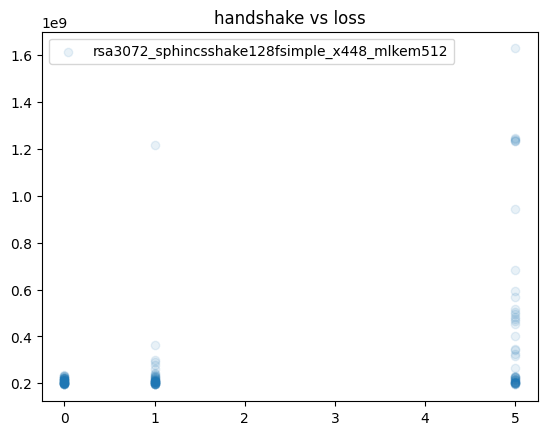

In [66]:
tmp=df[(df.combination=='p256_snova2454shake_x448_mlkem512') & (df.delay==25) & (df.mtu==1500)]
plt.scatter(tmp.loss,tmp.handshake_ns, label=combo, alpha=0.1)
plt.title('handshake vs loss')
plt.legend()
plt.show()

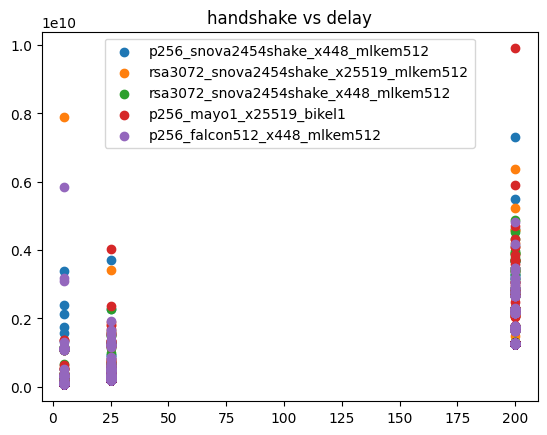

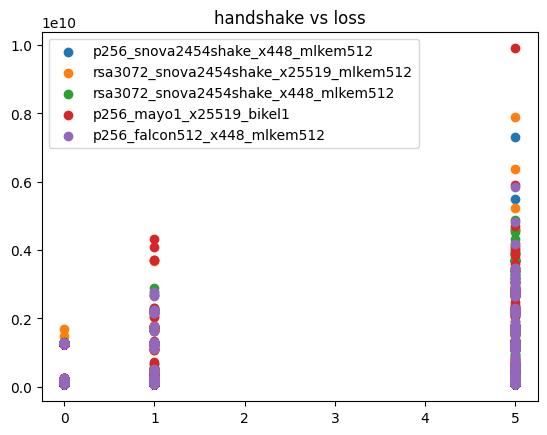

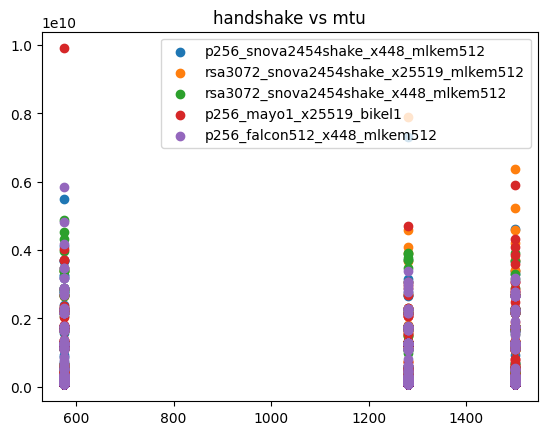

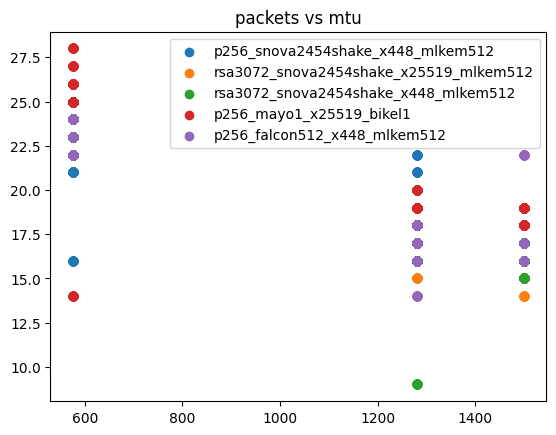

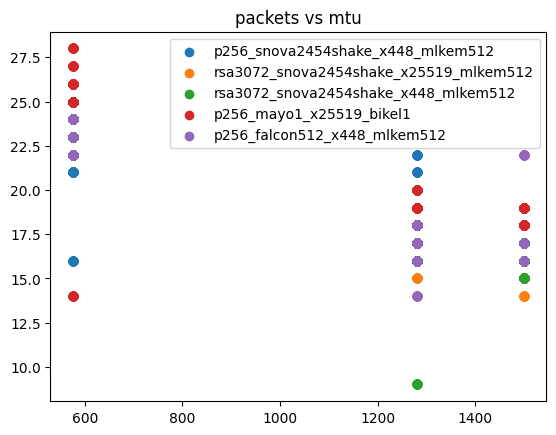

In [67]:
import matplotlib.pyplot as plt
#plot combination as lines, y as handshake, x as delay, loss, mtu
# plot combination as lines, y as packets, mtu as x (and maybe loss)
# df_plotting=df
# df_plotting['combination']=df.cl_sig+'_'+df.pq_sig+'_'+df.cl+'_'+df.pq
combinations=['p256_snova2454shake_x448_mlkem512',
              'rsa3072_snova2454shake_x25519_mlkem512',
              'rsa3072_snova2454shake_x448_mlkem512',
              'p256_mayo1_x25519_bikel1',
              'p256_falcon512_x448_mlkem512']

# handshake_ns
## delay
for combo in combinations:
        tmp=df_plotting[df_plotting.combination==combo]
        plt.scatter(tmp.delay,tmp.handshake_ns, label=combo)
plt.title('handshake vs delay')
plt.legend()
plt.show()

## loss
for combo in combinations:
        tmp=df_plotting[df_plotting.combination==combo]
        plt.scatter(tmp.loss,tmp.handshake_ns, label=combo)
plt.title('handshake vs loss')
plt.legend()
plt.show()

## mtu
for combo in combinations:
        tmp=df_plotting[df_plotting.combination==combo]
        plt.scatter(tmp.mtu,tmp.handshake_ns, label=combo)
plt.title('handshake vs mtu')
plt.legend()
plt.show()

# packets vs mtu
for combo in combinations:
        tmp=df_plotting[df_plotting.combination==combo]
        plt.scatter(tmp.mtu,tmp.packets, label=combo)
plt.title('packets vs mtu')
plt.legend()
plt.show()

# handshake vs memory
for combo in combinations:
        tmp=df_plotting[df_plotting.combination==combo]
        plt.scatter(tmp.mtu,tmp.packets, label=combo)
plt.title('packets vs mtu')
plt.legend()
plt.show()

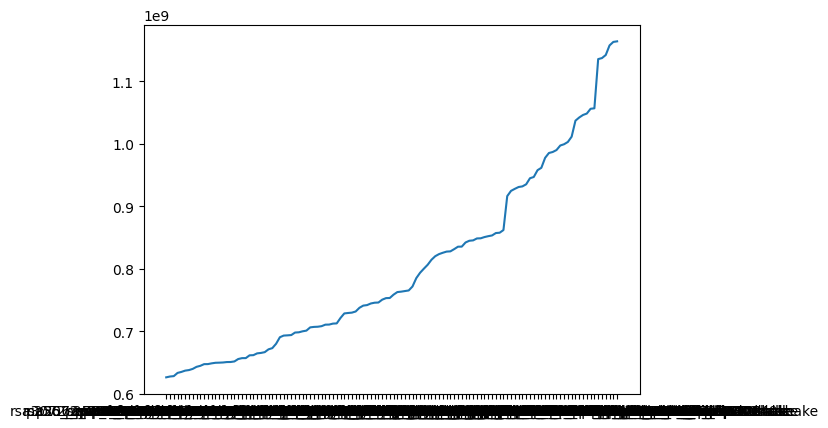

In [68]:
plt.plot(df.groupby('combination').handshake_ns.mean().sort_values())
# can I segment this in any way? like  can I draw a box around when we are using x algorithm?

In [69]:
# this is better for querying
groups=['cl_sig','pq_sig','cl','pq']
grouping=df.groupby(groups).handshake_ns.mean().sort_values()
grouping

cl_sig   pq_sig                  cl      pq           
p256     snova2454shake          x448    mlkem512         6.265590e+08
rsa3072  snova2454shake          x25519  mlkem512         6.278816e+08
                                 x448    mlkem512         6.285116e+08
p256     mayo1                   x25519  bikel1           6.336489e+08
         falcon512               x448    mlkem512         6.352185e+08
                                                              ...     
rsa3072  sphincsshake128fsimple  x448    frodo640shake    1.137260e+09
                                 p256    frodo640shake    1.142178e+09
p256     sphincsshake128fsimple  x448    frodo640shake    1.157504e+09
                                 p256    frodo640shake    1.163118e+09
rsa3072  sphincsshake128fsimple  x25519  frodo640shake    1.164049e+09
Name: handshake_ns, Length: 120, dtype: float64

In [70]:
print(df.pq.unique())
print(df.cl.unique())
print(df.cl_sig.unique())
print(df.pq_sig.unique())

['bikel1' 'frodo640shake' 'hqc128' 'mlkem512']
['p256' 'x25519' 'x448']
['p256' 'rsa3072']
['falcon512' 'mayo1' 'mldsa44' 'snova2454shake' 'sphincsshake128fsimple']


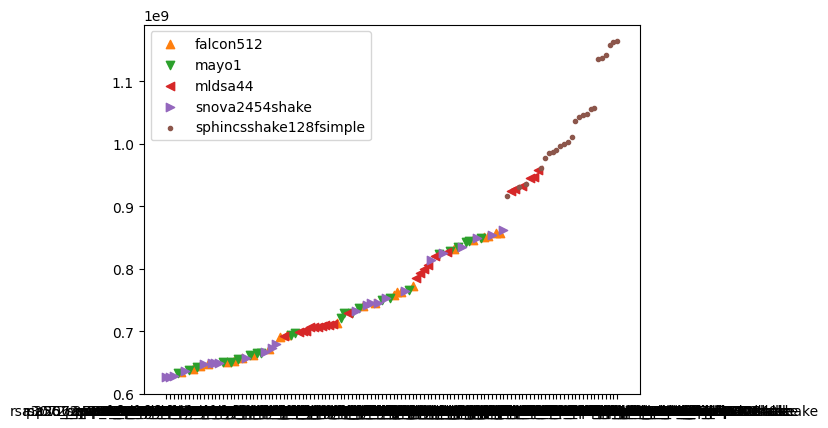

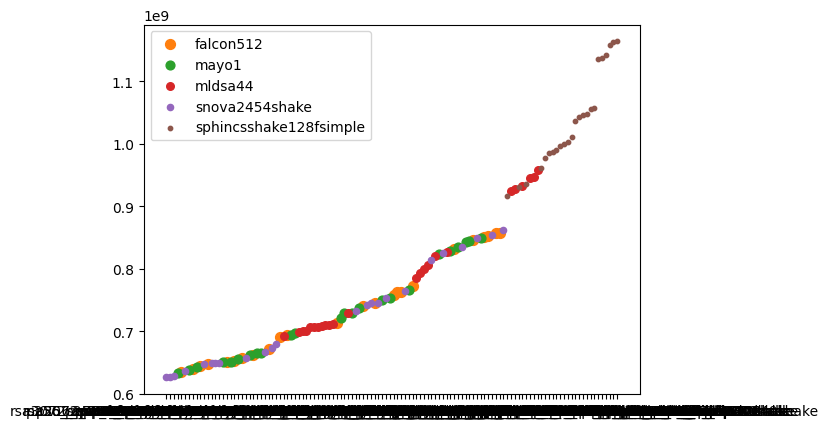

In [71]:
grouping=df.groupby('combination').handshake_ns.mean().sort_values()
x=grouping.index
y=grouping
plt.scatter(x,y, alpha=0)

for pq_sig, mark in zip(df.pq_sig.unique(),["^",'v','<','>','.']):
    x2=grouping[grouping.index.str.contains(pq_sig)].index
    y2=grouping[grouping.index.str.contains(pq_sig)]
    plt.scatter(x2,y2, label=pq_sig,marker=mark)
plt.legend()
plt.show()

grouping=df.groupby('combination').handshake_ns.mean().sort_values()
x=grouping.index
y=grouping
plt.scatter(x,y, alpha=0)

for pq_sig, size in zip(df.pq_sig.unique(),[50,40,30,20,10]):
    x2=grouping[grouping.index.str.contains(pq_sig)].index
    y2=grouping[grouping.index.str.contains(pq_sig)]
    plt.scatter(x2,y2, label=pq_sig,s=size)
plt.legend()
plt.show()

# if contains x colour etc

In [72]:

# if contains x colour etc

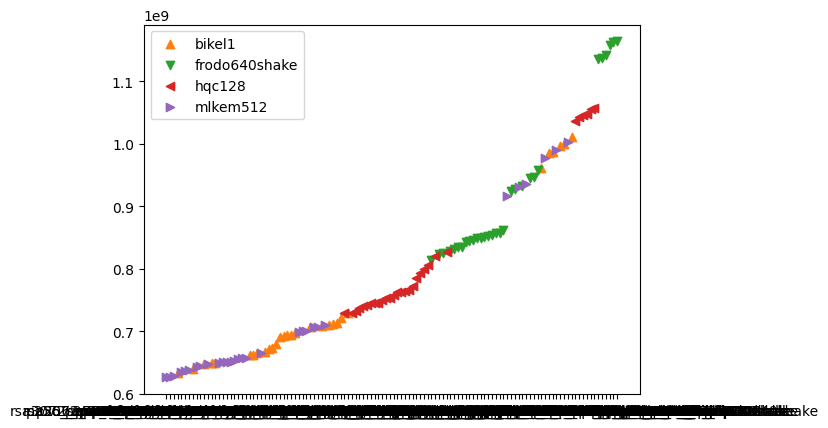

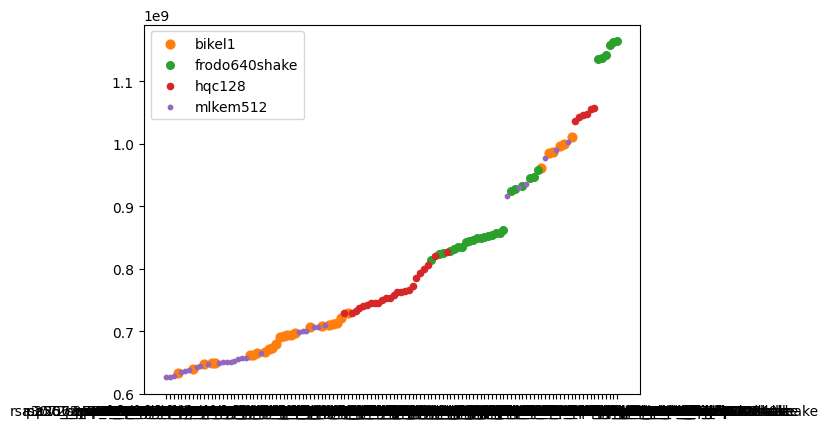

In [73]:
grouping=df.groupby('combination').handshake_ns.mean().sort_values()
x=grouping.index
y=grouping
plt.scatter(x,y, alpha=0)
for pq, mark in zip(df.pq.unique(),["^",'v','<','>']):
    x2=grouping[grouping.index.str.contains(pq)].index
    y2=grouping[grouping.index.str.contains(pq)]
    plt.scatter(x2,y2, label=pq, marker=mark)
plt.legend()
plt.show()

grouping=df.groupby('combination').handshake_ns.mean().sort_values()
x=grouping.index
y=grouping
plt.scatter(x,y, alpha=0)
for pq, size in zip(df.pq.unique(),[40,30,20,10]):
    x2=grouping[grouping.index.str.contains(pq)].index
    y2=grouping[grouping.index.str.contains(pq)]
    plt.scatter(x2,y2, label=pq, s=size)
plt.legend()
plt.show()
# if contains x colour etc

This compresses the network affects into one value.

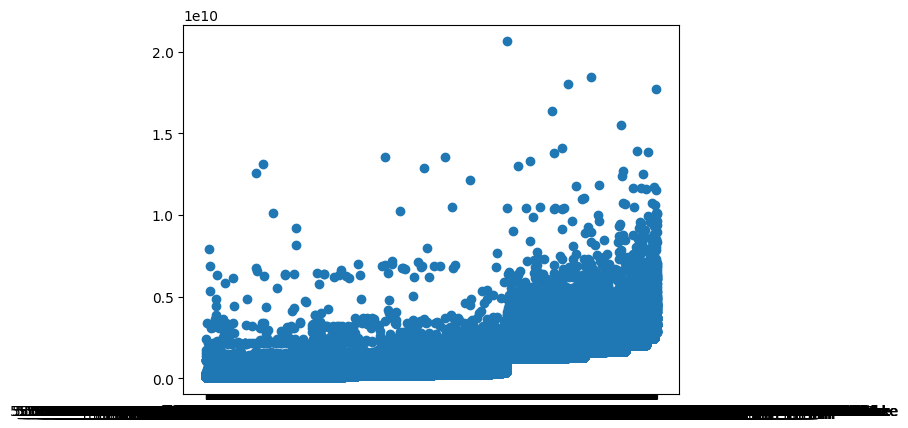

In [74]:
sorted=df.sort_values('handshake_ns').copy()
sorted['combination']=sorted.delay.astype(str)+"_"+sorted.loss.astype(str)+"_"+sorted.mtu.astype(str)+"_"+sorted.cl_sig+"_"+sorted.pq_sig+"_"+sorted.cl+"_"+sorted.pq
plt.scatter(sorted.combination,sorted.handshake_ns)

# like this because 50 per combination


# ---

In [75]:
y=sorted.groupby('combination').handshake_ns.mean().sort_values()
x=y.index


In [76]:
y.shape

(3240,)

(1080,)
(1080,)
(1080,)


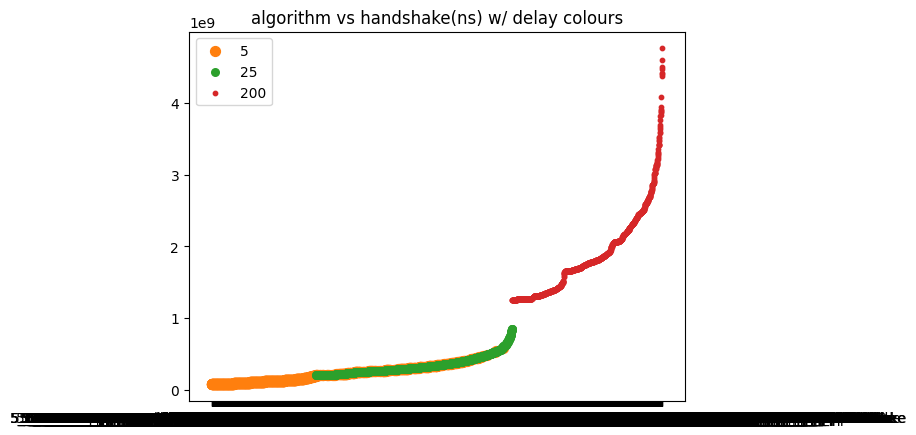

(1080,)
(1080,)
(1080,)


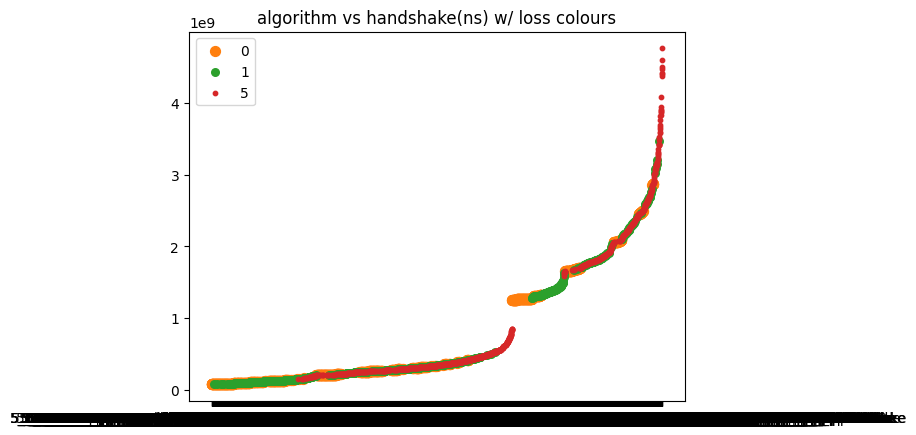

(1080,)
(1080,)
(1080,)


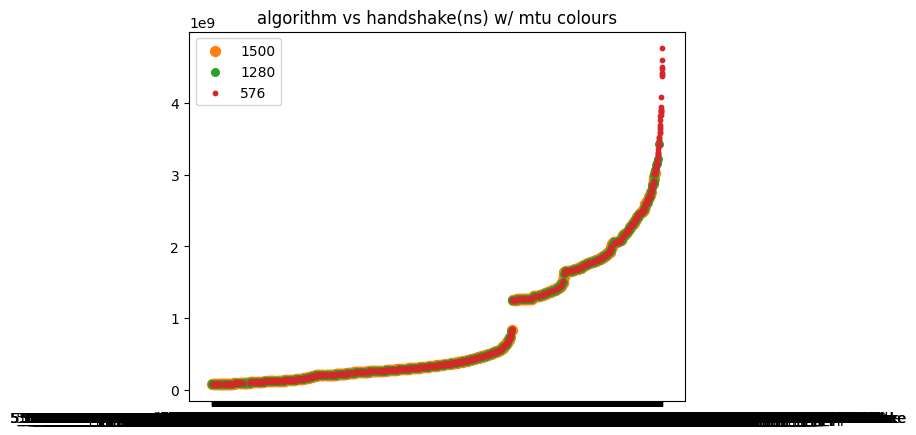

In [77]:
plt.scatter(x,y, alpha=0)# do this to get all on x axis
for i, size in zip([5,25,200],[50,30,10]):
    y2=y[y.index.to_series().str.contains(f'^{i}_', regex=True)]
    x2=y2.index
    print(y2.shape)
    plt.scatter(x2,y2,s=size, label=i)
plt.legend()
plt.title('algorithm vs handshake(ns) w/ delay colours')
plt.show()

plt.scatter(x,y, alpha=0)
for i, size in zip([0,1,5],[50,30,10]):
    y2=y[y.index.to_series().str.contains(f'^[0-9]+_{i}_', regex=True)]
    x2=y2.index
    print(y2.shape)
    plt.scatter(x2,y2,s=size, label=i)
plt.legend()
plt.title('algorithm vs handshake(ns) w/ loss colours')
plt.show()

plt.scatter(x,y, alpha=0)
for i, size in zip([1500,1280,576],[50,30,10]):
    y2=y[y.index.to_series().str.contains(f'^[0-9]+_[0-9]+_{i}_', regex=True)]
    x2=y2.index
    print(y2.shape)
    plt.scatter(x2,y2,s=size, label=i)
plt.legend()
plt.title('algorithm vs handshake(ns) w/ mtu colours')
plt.show()

I dont know if this shows anything...
the mtu one is the most sup.rising, as it looks like it is everywhere. the print does confirm that there is the correct number

# ---

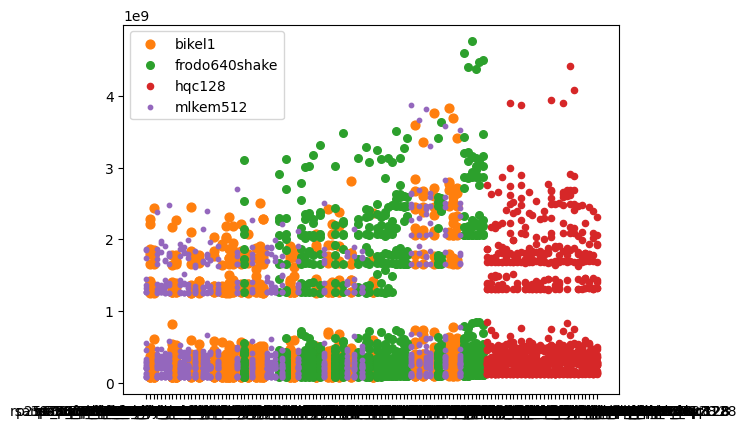

In [78]:
groups=['delay','loss','mtu','cl_sig','pq_sig','cl','pq','combination']
grouping=df.groupby(groups).handshake_ns.mean().sort_values()
# plt.scatter(grouping.index,grouping)
x=grouping.index.get_level_values('combination')
y=grouping
plt.scatter(x,y, alpha=0)

for pq, size in zip(df.pq.unique(),[40,30,20,10]):
    y2=grouping[grouping.index.get_level_values('pq').str.contains(pq)]
    x2=y2.index.get_level_values('combination')
    plt.scatter(x2,y2, label=pq, s=size)
plt.legend()
plt.show()


# the order is messed up because of the groupings...


In [79]:
grouping

delay  loss  mtu   cl_sig   pq_sig                  cl      pq             combination                                        
5      0     1280  rsa3072  falcon512               x25519  mlkem512       rsa3072_falcon512_x25519_mlkem512                      7.872008e+07
                                                            bikel1         rsa3072_falcon512_x25519_bikel1                        7.926585e+07
                                                    x448    bikel1         rsa3072_falcon512_x448_bikel1                          7.939408e+07
                   p256     mldsa44                 x25519  mlkem512       p256_mldsa44_x25519_mlkem512                           7.965248e+07
                   rsa3072  falcon512               x448    mlkem512       rsa3072_falcon512_x448_mlkem512                        8.013029e+07
                                                                                                                                      ...     
200    5     57

- sum sig, ct and ss?
- get total bytes from pcap?

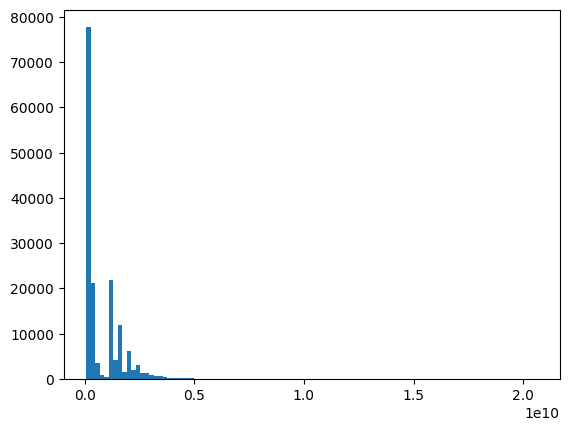

In [80]:
plt.hist(df.handshake_ns, bins=100)
plt.show()

In [81]:
import matplotlib.pyplot as plt

In [85]:
df.pq_sig.unique()

array(['falcon512', 'mayo1', 'mldsa44', 'snova2454shake',
       'sphincsshake128fsimple'], dtype=object)

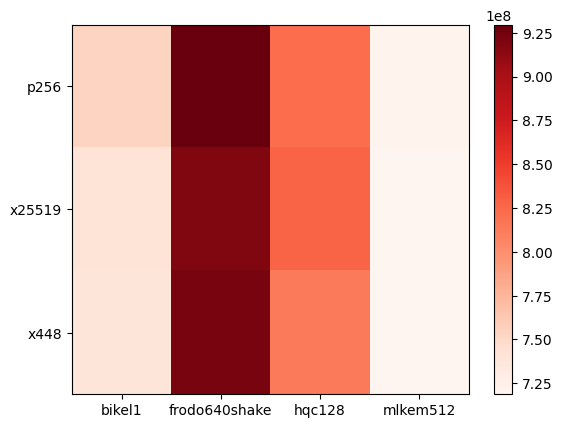

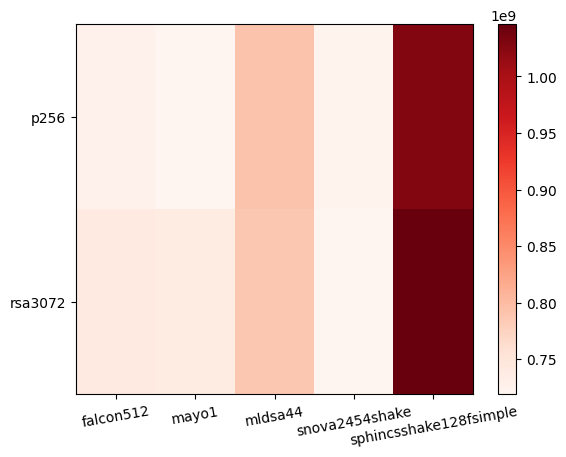

In [ ]:
data=pd.crosstab(index=df.cl, columns=df.pq, values=df.handshake_ns, aggfunc='mean').values
plt.imshow(data, cmap='Reds', aspect='auto')
plt.yticks([0,1,2],df.cl.unique())
plt.xticks([0,1,2,3],df.pq.unique())
plt.colorbar()
plt.show()

data=pd.crosstab(index=df.cl_sig, columns=df.pq_sig, values=df.handshake_ns, aggfunc='mean').values
plt.imshow(data, cmap='Reds', aspect='auto')
plt.yticks([0,1],df.cl_sig.unique())
plt.xticks([0,1,2,3,4],df.pq_sig.unique(),rotation=10)
plt.colorbar()
plt.show()

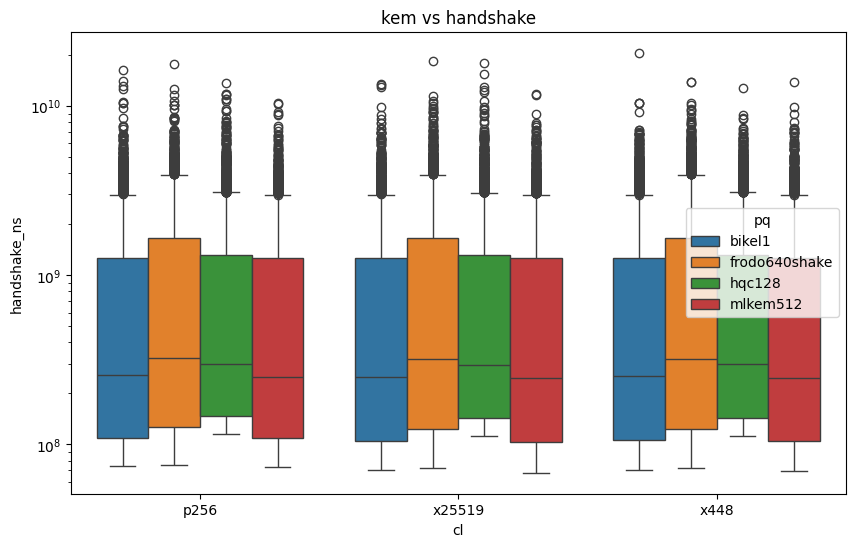

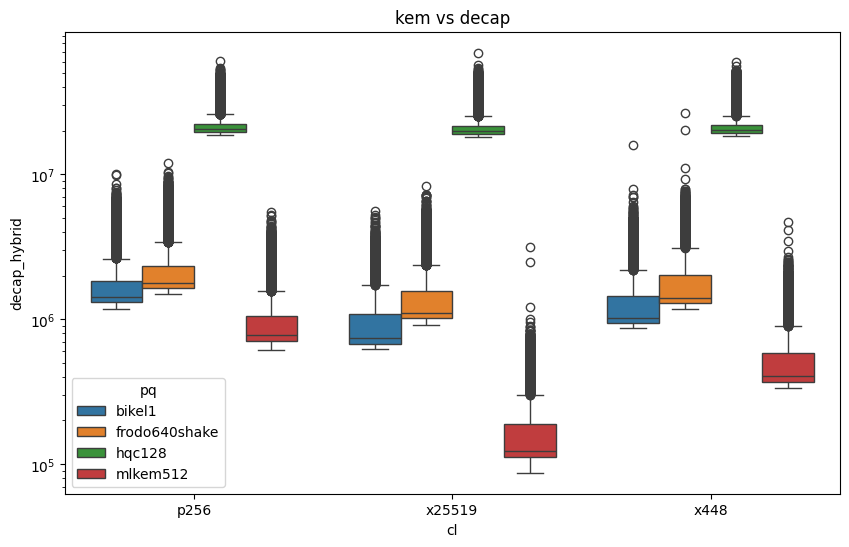

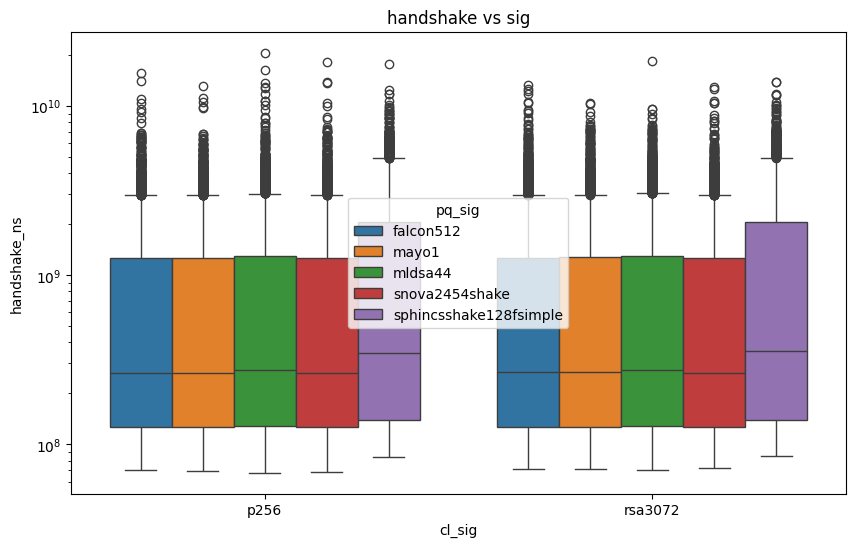

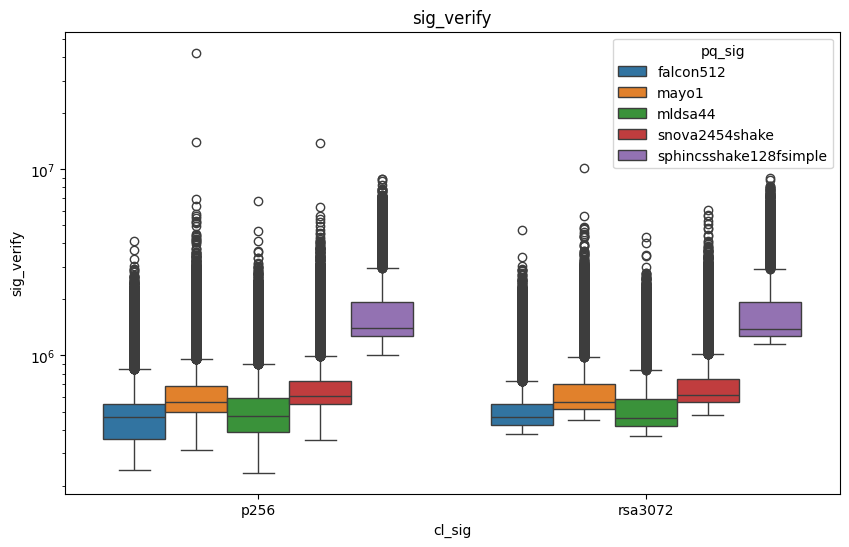

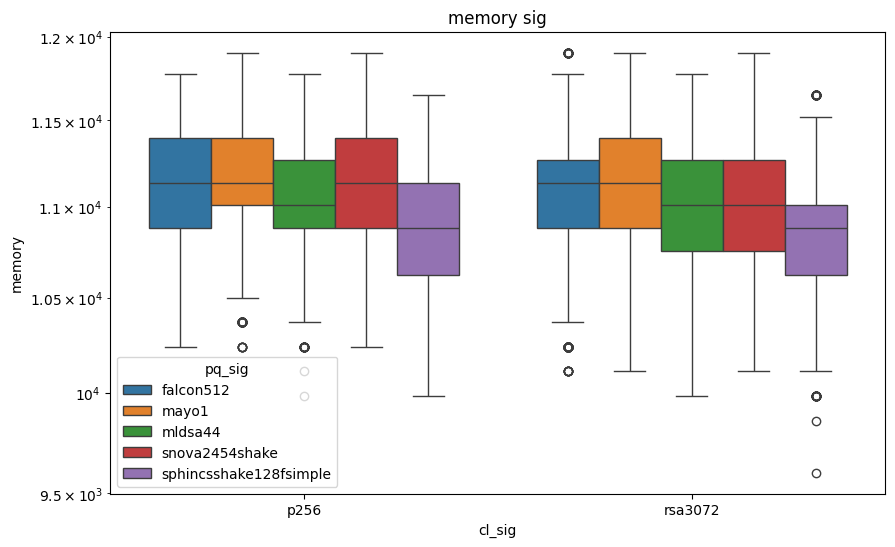

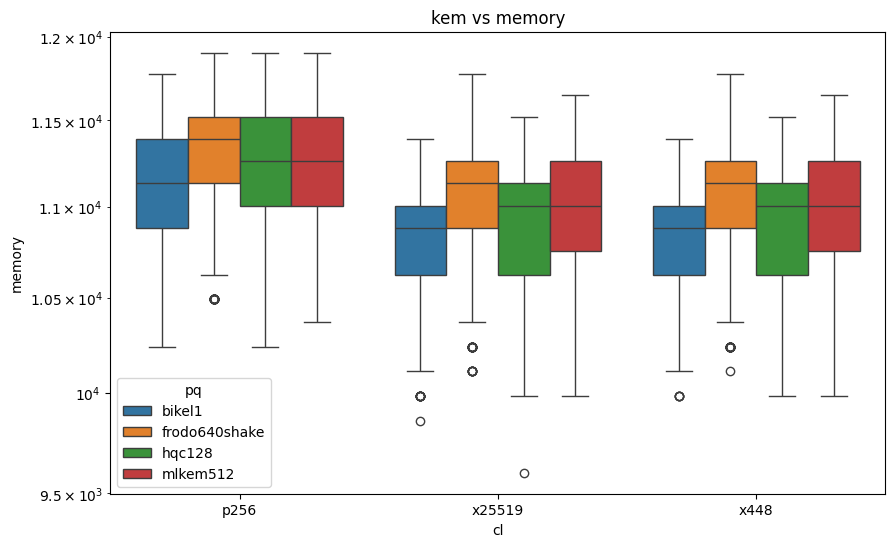

In [244]:
import seaborn as sns

# KEM
summary = df.groupby(['cl','pq']).agg(
    n=('handshake_ns','count'),
    median=('handshake_ns','median'),
    mean=('handshake_ns','mean'),
    std=('handshake_ns','std'),
    cv=('handshake_ns', lambda x: x.std()/x.mean())
).reset_index()

# boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='cl', y='handshake_ns', hue='pq')
plt.yscale('log')  # if skewed
plt.title("kem vs handshake")
plt.show()

# Dec
summary = df.groupby(['cl','pq']).agg(
    n=('decap_hybrid','count'),
    median=('decap_hybrid','median'),
    mean=('decap_hybrid','mean'),
    std=('decap_hybrid','std'),
    cv=('decap_hybrid', lambda x: x.std()/x.mean())
).reset_index()

# boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='cl', y='decap_hybrid', hue='pq')
plt.yscale('log')  # if skewed
plt.title("kem vs decap")
plt.show()

# sig
summary = df.groupby(['cl_sig','pq_sig']).agg(
    n=('handshake_ns','count'),
    median=('handshake_ns','median'),
    mean=('handshake_ns','mean'),
    std=('handshake_ns','std'),
    cv=('handshake_ns', lambda x: x.std()/x.mean())
).reset_index()

# boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='cl_sig', y='handshake_ns', hue='pq_sig')
plt.yscale('log')  # if skewed
plt.title("handshake vs sig")
plt.show()

# verify
summary = df.groupby(['cl_sig','pq_sig']).agg(
    n=('sig_verify','count'),
    median=('sig_verify','median'),
    mean=('sig_verify','mean'),
    std=('sig_verify','std'),
    cv=('sig_verify', lambda x: x.std()/x.mean())
).reset_index()

# boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='cl_sig', y='sig_verify', hue='pq_sig')
plt.yscale('log')  # if skewed
plt.title("sig_verify")
plt.show()


# memory-SIG
summary = df.groupby(['cl_sig','pq_sig']).agg(
    n=('memory','count'),
    median=('memory','median'),
    mean=('memory','mean'),
    std=('memory','std'),
    cv=('memory', lambda x: x.std()/x.mean())
).reset_index()

# boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='cl_sig', y='memory', hue='pq_sig')
plt.yscale('log')  # if skewed
plt.title("memory sig")
plt.show()

# memory-KEM
summary = df.groupby(['cl','pq']).agg(
    n=('memory','count'),
    median=('memory','median'),
    mean=('memory','mean'),
    std=('memory','std'),
    cv=('memory', lambda x: x.std()/x.mean())
).reset_index()

# boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='cl', y='memory', hue='pq')
plt.yscale('log')  # if skewed
plt.title("kem vs memory")
plt.show()

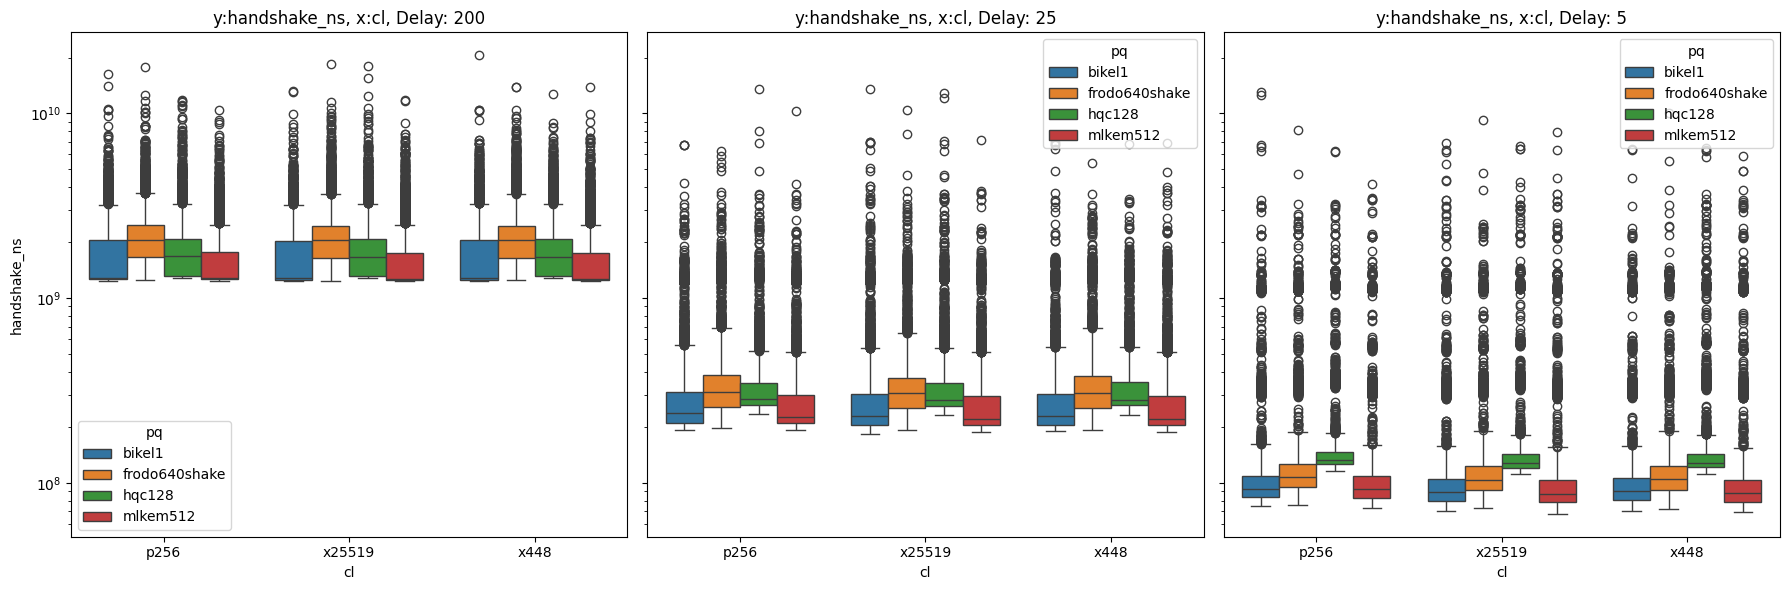

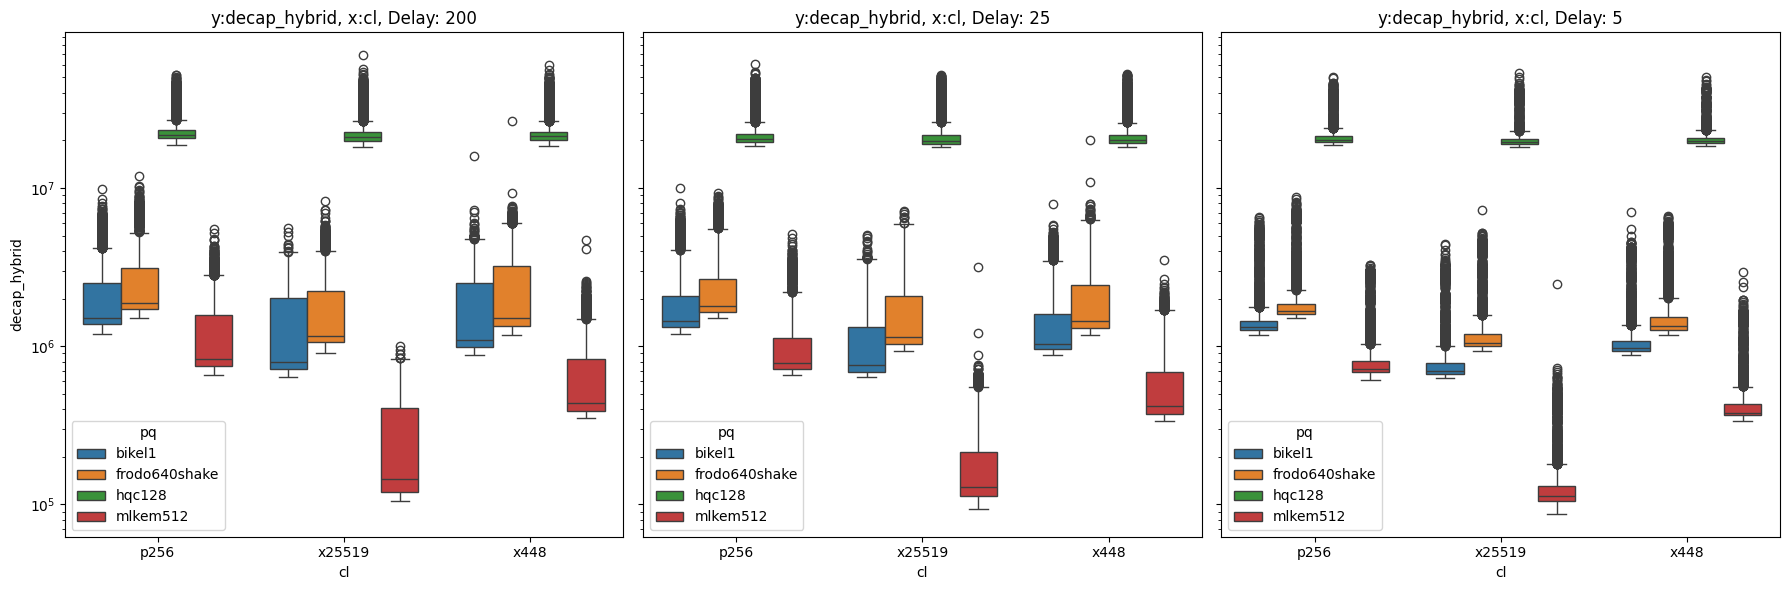

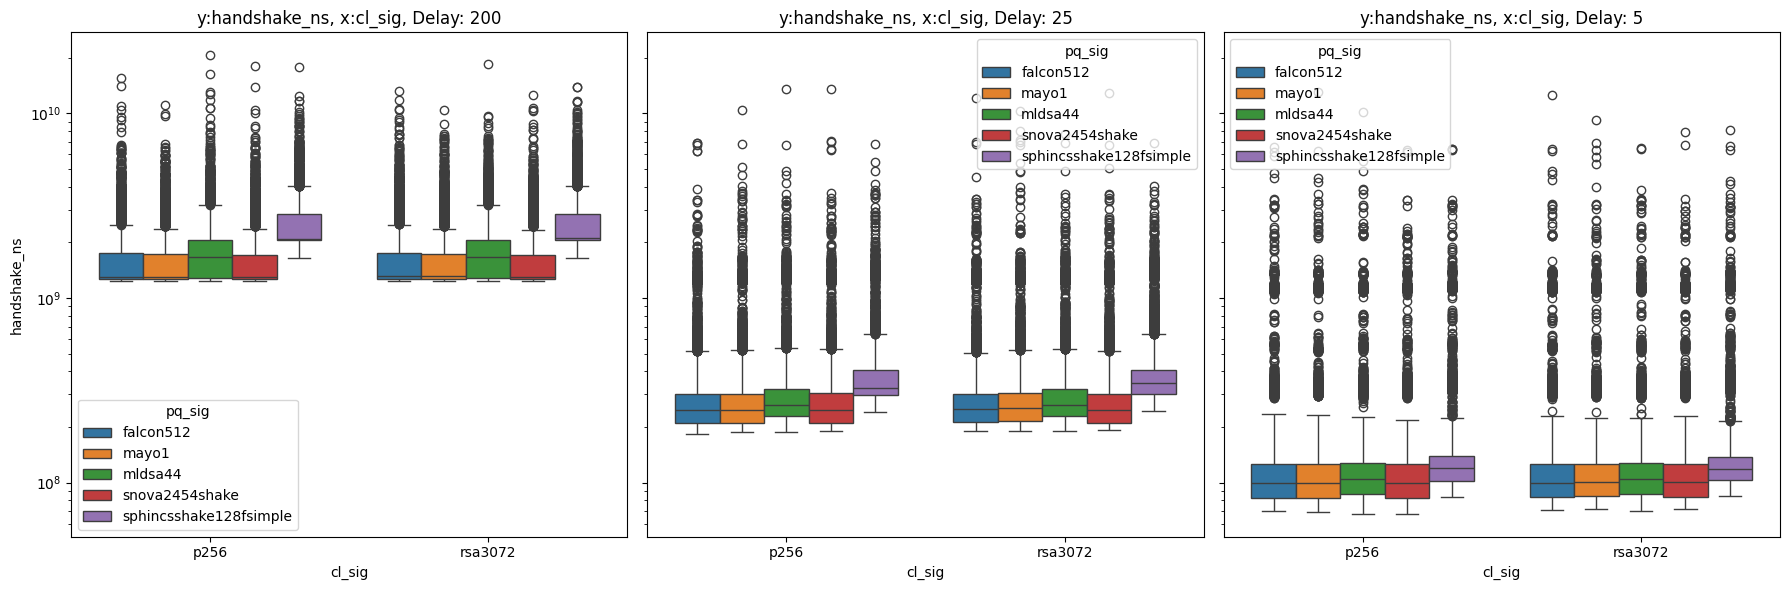

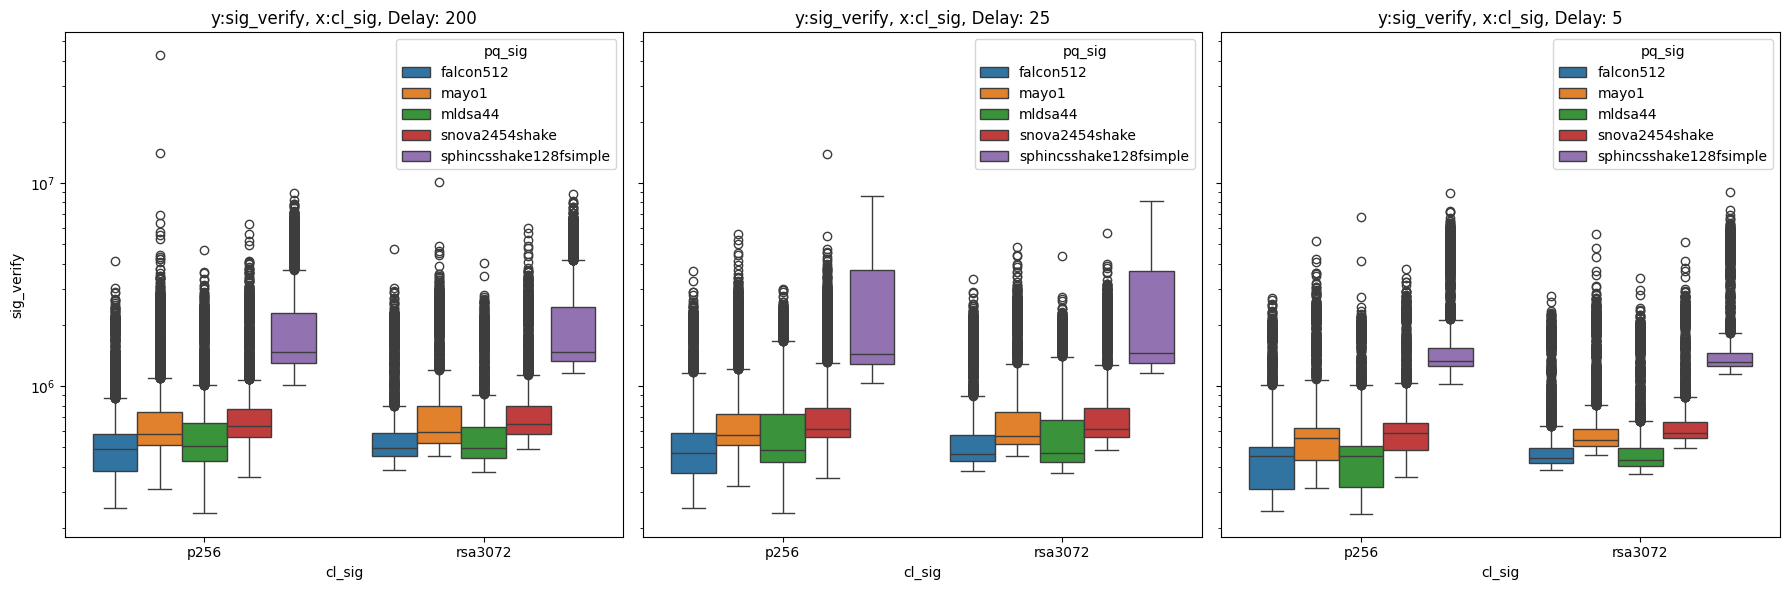

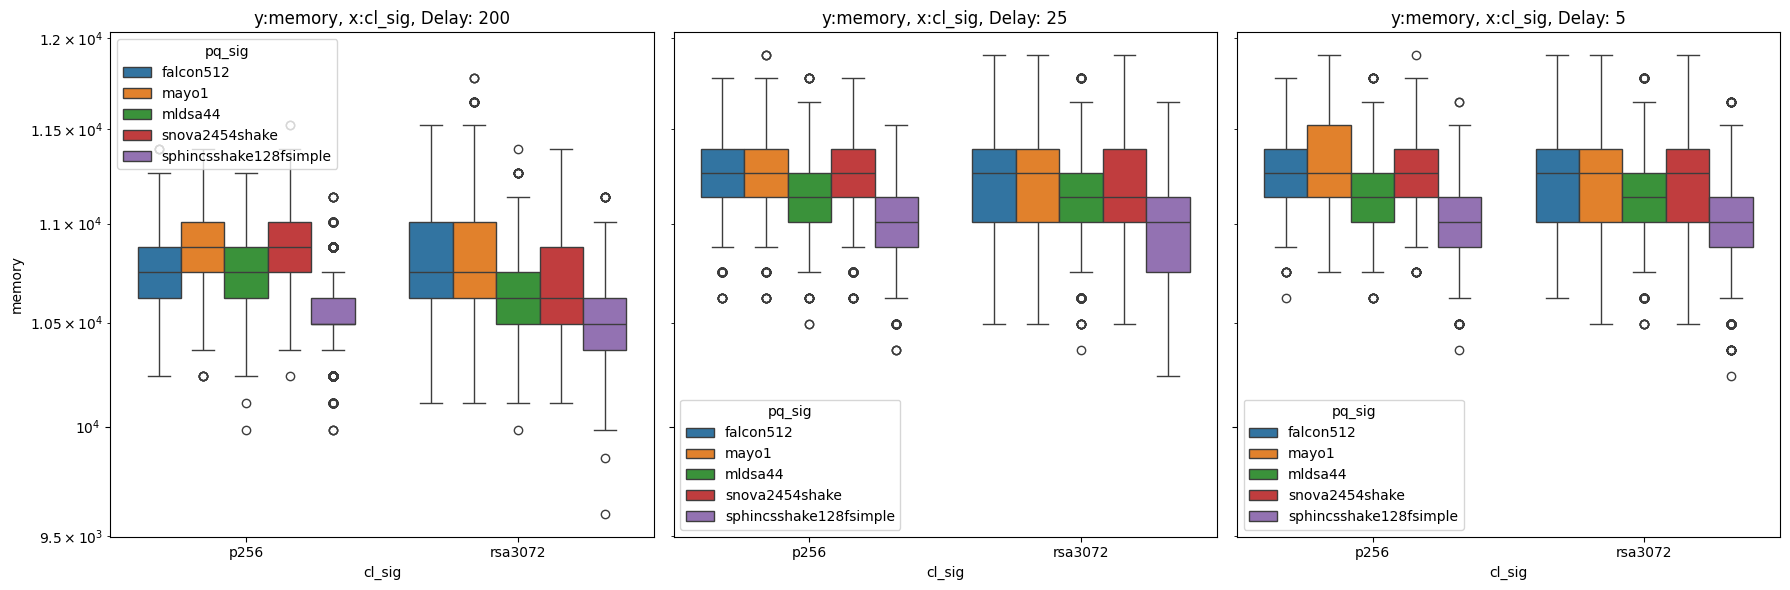

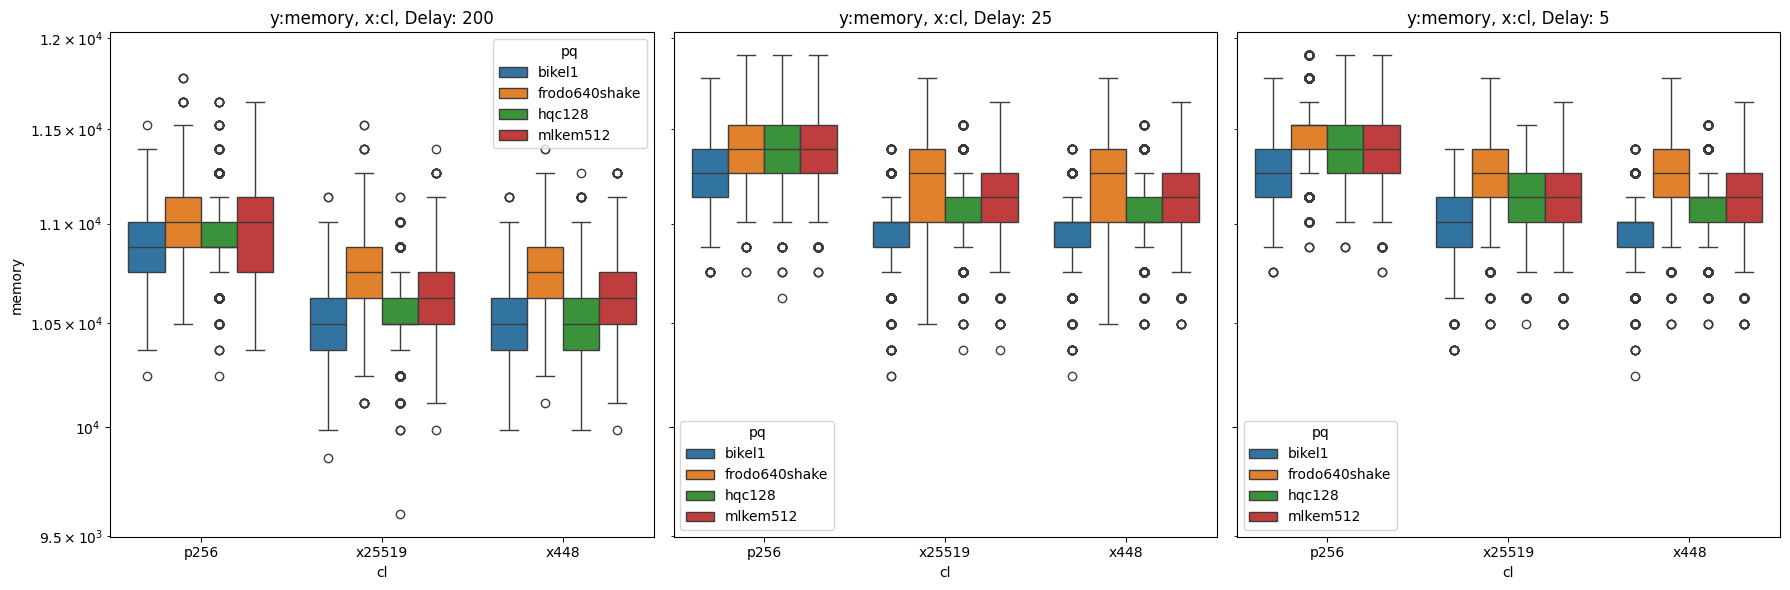

In [243]:
def make_box_plots(y, x_axis, hue, df):
    delay_values = df['delay'].unique()
    n = len(delay_values)

    # 1. Create subplots — one per delay
    fig, axes = plt.subplots(1, n, figsize=(6*n, 6), sharey=True)

    # If only one delay value, axes won’t be iterable — handle that case
    if n == 1:
        axes = [axes]

    # 2. Loop through each delay value and corresponding subplot
    for ax, delay_value in zip(axes, delay_values):
        df_sub = df[df['delay'] == delay_value]

        sns.boxplot(
            data=df_sub,
            x=x_axis,
            y=y,
            hue=hue,
            ax=ax
        )
        ax.set_title(f"y:{y}, x:{x_axis}, Delay: {delay_value}")
        ax.set_yscale('log')  # optional for skewed data
        ax.set_xlabel(x_axis)
        ax.set_ylabel(y)

    # 3. Adjust layout
    plt.tight_layout()
    plt.show()
make_box_plots("handshake_ns",'cl','pq',df)
make_box_plots("decap_hybrid",'cl','pq',df)
make_box_plots("handshake_ns",'cl_sig','pq_sig',df)
make_box_plots("sig_verify",'cl_sig','pq_sig',df)
make_box_plots("memory",'cl_sig','pq_sig',df)
make_box_plots("memory",'cl','pq',df)


In [207]:
df_norm=df.copy()

col_to_normalise=['handshake_ns','delay', 'loss', 'mtu', 'decap_cl', 'decap_pq', 'decap_hybrid',
       'sig_verify', 'cpu', 'memory', 'encap_cl', 'encap_pq', 'encap_hybrid',
       'packets']

df_norm[col_to_normalise]=normalize(df_norm[col_to_normalise])

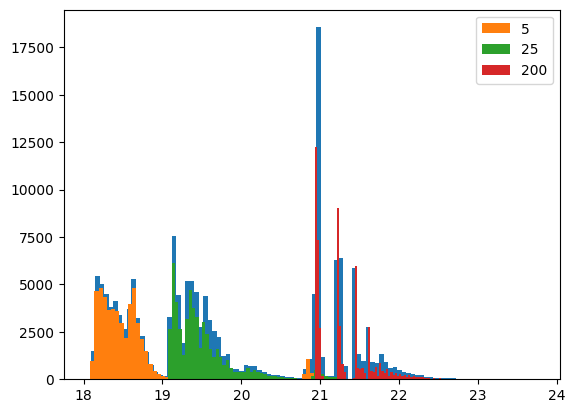

In [208]:
plt.hist(np.log(df.handshake_ns),bins=100)
plt.hist(np.log(df[df.delay==5].handshake_ns),bins=100,label=5)
plt.hist(np.log(df[df.delay==25].handshake_ns),bins=100,label=25)
plt.hist(np.log(df[df.delay==200].handshake_ns),bins=100,label=200)
plt.legend()
plt.show()
#logged to remove right skew, still there

In [209]:
df_norm.handshake_ns.describe()

count    162000.000000
mean          0.996856
std           0.008752
min           0.905897
25%           0.999672
50%           0.999933
75%           0.999995
max           1.000000
Name: handshake_ns, dtype: float64

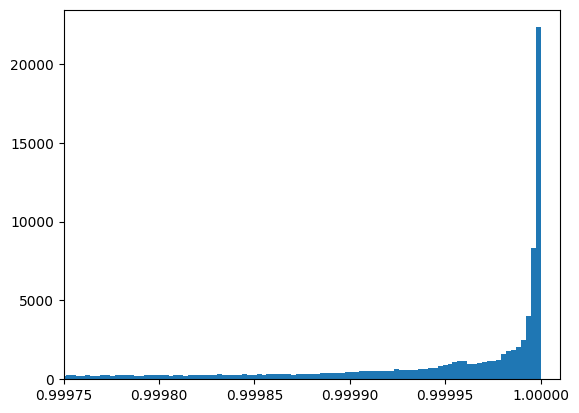

In [210]:
plt.hist(df_norm.handshake_ns**3,bins=100000)
# plt.hist(df_norm[df.delay==5].handshake_ns,bins=100,label=5)
# plt.hist(df_norm[df.delay==25].handshake_ns,bins=100,label=25)
# plt.hist(df_norm[df.delay==200].handshake_ns,bins=100,label=200)
# plt.legend()
plt.xlim([.99975,1.00001])
plt.show()
#logged to remove
#logged to remove right skew, still there

seems like normlising time messes something up...

Is this because there are 3 distributions due to the affect of delay?

# How much is the crypto vs other?

count    162000.000000
mean          0.027037
std           0.044296
min           0.000087
25%           0.002944
50%           0.010343
75%           0.021373
max           0.332743
dtype: float64


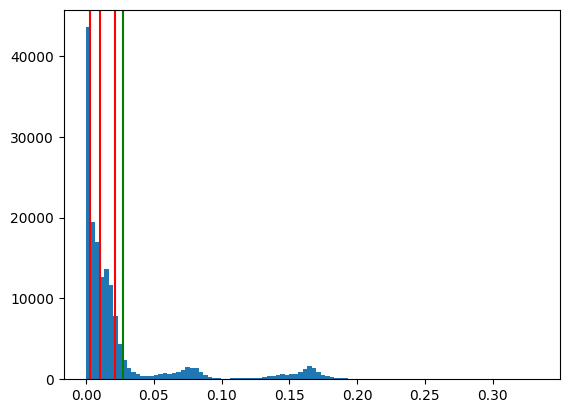

In [223]:
data=(df.sig_verify+df.decap_hybrid)/df.handshake_ns
desc=data.describe()
print(data.describe())
plt.hist(data,bins=100)
plt.axvline(x=desc.loc['mean'], c='g')#mean
plt.axvline(x= desc.loc['25%'], c='r')
plt.axvline(x=desc.loc['50%'], c='r')
plt.axvline(x=desc.loc['75%'], c='r')
plt.show()


count    162000.000000
mean          0.027037
std           0.044296
min           0.000087
25%           0.002944
50%           0.010343
75%           0.021373
max           0.332743
dtype: float64


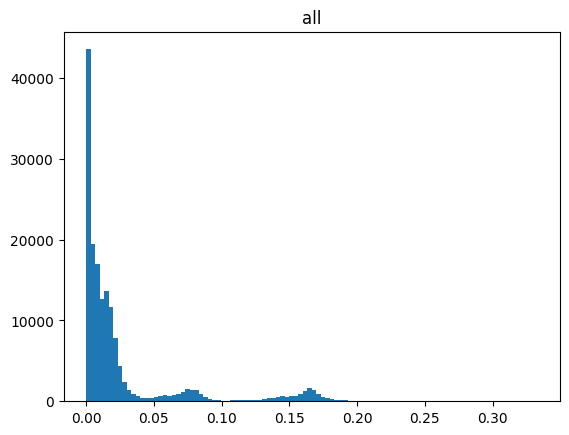

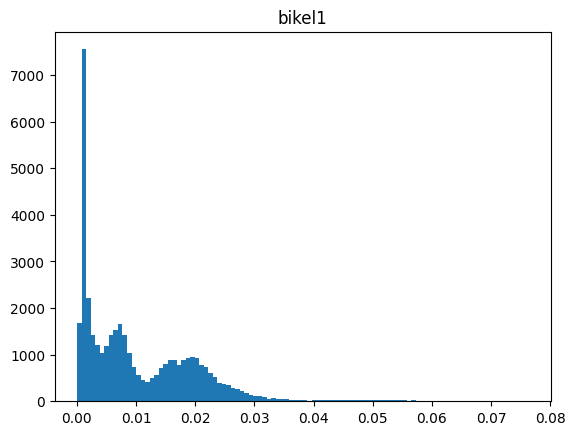

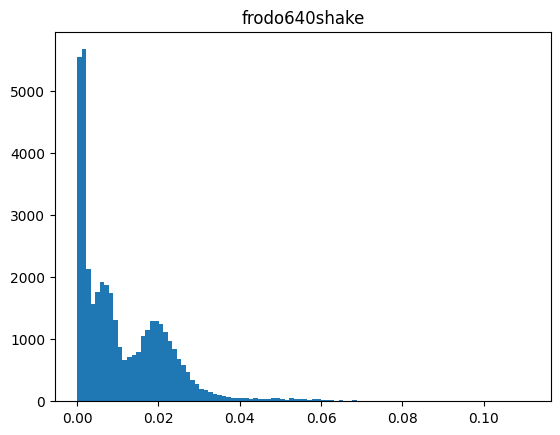

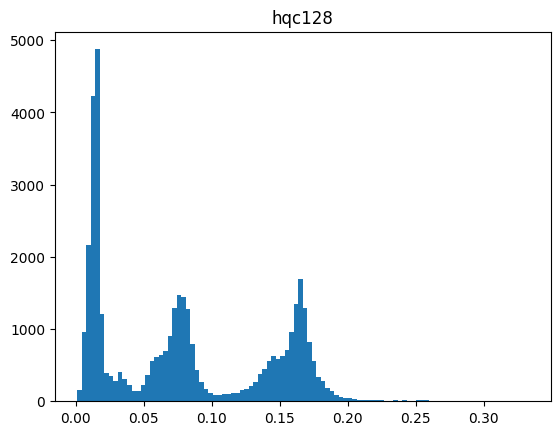

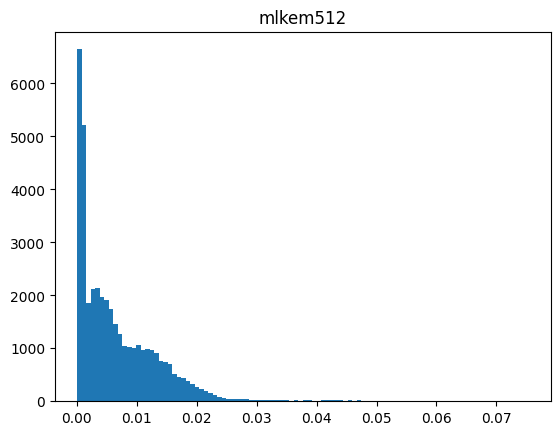

In [212]:
data=(df.sig_verify+df.decap_hybrid)/df.handshake_ns
print(data.describe())
plt.hist(data,bins=100)
plt.title('all')
plt.show()
for i in df.pq.unique():
    tmp=df[df.pq==i]
    data=(tmp.sig_verify+tmp.decap_hybrid)/tmp.handshake_ns
    plt.hist(data,bins=100)
    plt.title(i)
    plt.show()

count    162000.000000
mean          0.027037
std           0.044296
min           0.000087
25%           0.002944
50%           0.010343
75%           0.021373
max           0.332743
dtype: float64


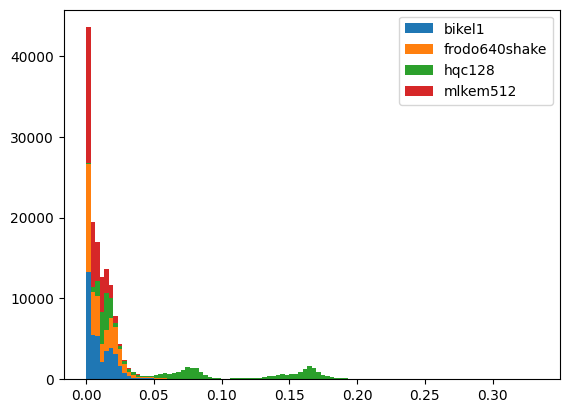

In [213]:
data=(df.sig_verify+df.decap_hybrid)/df.handshake_ns
print(data.describe())
# plt.hist(data,bins=100)
plt.show()
all_data=[]
for i in df.pq.unique():
    tmp=df[df.pq==i]
    data=(tmp.sig_verify+tmp.decap_hybrid)/tmp.handshake_ns
    all_data.append(data)
plt.hist(all_data, bins=100, stacked=True, histtype='barstacked', label=df.pq.unique())
plt.legend()
plt.show()


count    162000.000000
mean          0.027037
std           0.044296
min           0.000087
25%           0.002944
50%           0.010343
75%           0.021373
max           0.332743
dtype: float64


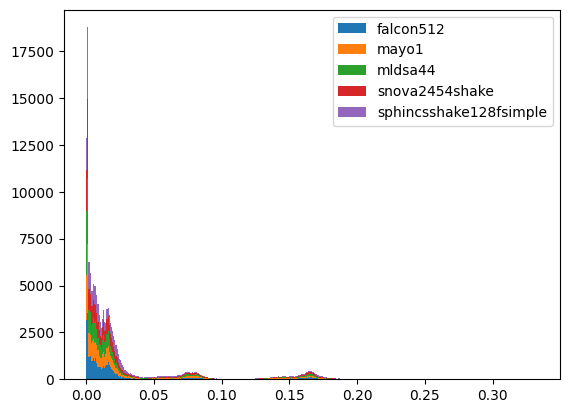

In [ ]:
data=(df.sig_verify+df.decap_hybrid)/df.handshake_ns
print(data.describe())
# plt.hist(data,bins=100)
# plt.show()
all_data=[]
for i in df.pq_sig.unique():
    tmp=df[df.pq_sig==i]
    data=(tmp.sig_verify+tmp.decap_hybrid)/tmp.handshake_ns
    all_data.append(data)
plt.hist(all_data, bins=400, stacked=True, histtype='barstacked', label=df.pq_sig.unique())
plt.legend()
plt.show()


- At most 19.5% is the crypto, how would I discount delay? doesn't matter, it is clear that the crypto doesn't take up that much time, what does though? does transferring the keys take up alot?
- from this we can see that signature verification is much more evenly spread out. with hqc (PQ KEM) being the main reason for the 2 other hills

count    162000.000000
mean          0.386452
std           0.341149
min           0.002167
25%           0.077621
50%           0.340012
75%           0.708334
max           0.995401
dtype: float64


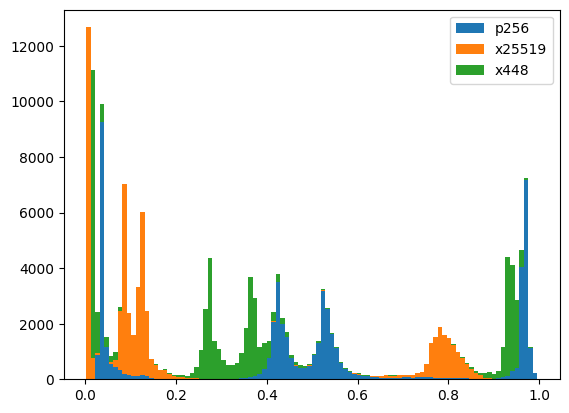

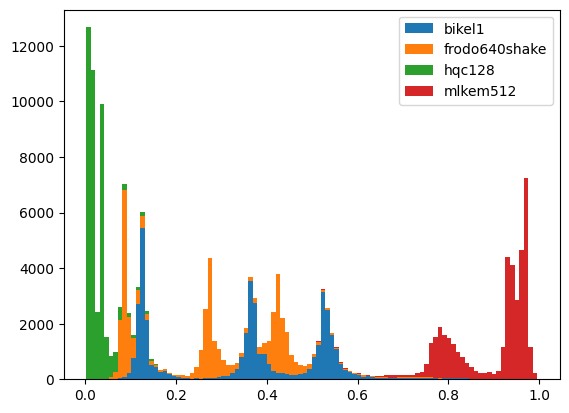

In [231]:
desc=(df.decap_cl/df.decap_hybrid).describe()
print(desc)
all_data=[]
for i in df.cl.unique():
    tmp=df[df.cl==i]
    data=(tmp.decap_cl)/tmp.decap_hybrid
    all_data.append(data)
plt.hist(all_data, bins=100, stacked=True, histtype='barstacked', label=df.cl.unique())
plt.legend()
plt.show()

all_data=[]
for i in df.pq.unique():
    tmp=df[df.pq==i]
    data=(tmp.decap_cl)/tmp.decap_hybrid
    all_data.append(data)
plt.hist(all_data, bins=100, stacked=True, histtype='barstacked', label=df.pq.unique())
plt.legend()
plt.show()

- from this I would say that the % is more based off the pq component...hard to tell though
- actually it is very weird that any are over 50%, because that would mean that the decap took longer the classical component

In [242]:
a=df[(df.decap_cl/df.decap_hybrid)>.5].groupby('pq').pq.count()
print(a)
a=df[(df.decap_cl/df.decap_hybrid)>.5].groupby('cl').pq.count()
print(a)


pq
bikel1           12781
frodo640shake     1299
mlkem512         40481
Name: pq, dtype: int64
cl
p256      27090
x25519    13481
x448      13990
Name: pq, dtype: int64


In [240]:
df[(df.decap_cl/df.decap_hybrid)>.5][['cl','pq']]

,cl,pq
0,p256,bikel1
1,p256,bikel1
2,p256,bikel1
3,p256,bikel1
4,p256,bikel1
...,...,...
210595,x448,mlkem512
210596,x448,mlkem512
210597,x448,mlkem512
210598,x448,mlkem512


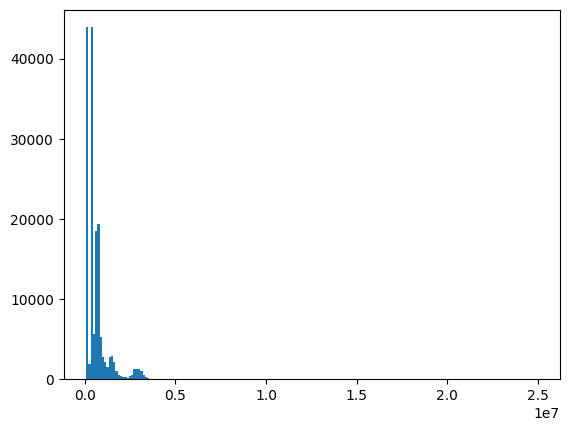

In [235]:
plt.hist(df.decap_cl,bins=200)
plt.show()

# Current problems
- anova on specific algorithms are not significantly different
- unclear if mlr was appropriate
- I don't know what to do with this data
- cant make pretty graphs as only 3 categories tested.
- p hacking?